In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from scipy.ndimage import label
from skimage.io import imread, imsave
from scipy import ndimage
import scipy.spatial
from scipy.stats import poisson
from sklearn.neighbors import NearestNeighbors
from scipy.spatial.distance import cdist

In [3]:
import pandas as pd
import pickle
from concurrent.futures import ThreadPoolExecutor

# Load the file
file_path = '/data/krishnendu/ripley_paper/generated_spots_analysis/generated_spots_analysis/results_for_uniform_2adj_spot_locations_dict.pkl'

with open(file_path, 'rb') as file:
    data = pickle.load(file)

# Define the columns for the new dataframe
columns = [
    'distribution', 'num_removed_spots', 'ripley_k_score', 'assortativity',
    'modularity', 'morans_i', 'mean_nearest_neighbor_distance',
    'pair_correlation_function', 'spot_density', 'local_clustering_coefficient',
    'dispersion_index'
]

# Function to process each entry
def process_entry(num_removed_spots, distribution):
    entry = data.loc[num_removed_spots, distribution]
    num_removed = int(num_removed_spots.split('_')[1])  # Extract the number of removed spots from the index
    
    # Extract the required values
    ripley_k_score = entry['ripley_k_score'][0] if 'ripley_k_score' in entry else None
    assortativity = entry.get('assortativity', None)
    modularity = entry.get('modularity', None)
    morans_i = entry.get('morans_i', None)
    mean_nearest_neighbor_distance = entry.get('mean_nearest_neighbor_distance', None)
    pair_correlation_function = entry['pair_correlation_function'][1] if 'pair_correlation_function' in entry else None
    spot_density = entry.get('spot_density', None)
    local_clustering_coefficient = entry.get('local_clustering_coefficient', None)
    dispersion_index = entry.get('dispersion_index', None)
    
    return [
        distribution, num_removed, ripley_k_score, assortativity,
        modularity, morans_i, mean_nearest_neighbor_distance,
        pair_correlation_function, spot_density, local_clustering_coefficient,
        dispersion_index
    ]

# Initialize an empty list to hold the new data
new_data = []

# Use ThreadPoolExecutor to run the process_entry function in parallel
with ThreadPoolExecutor() as executor:
    futures = []
    for num_removed_spots in data.index:
        for distribution in data.columns:
            futures.append(executor.submit(process_entry, num_removed_spots, distribution))
    
    for future in futures:
        new_data.append(future.result())

# Create the new dataframe
new_df = pd.DataFrame(new_data, columns=columns)


/home/nciadmin/anaconda3/envs/hitips_env/lib/python3.9/site-packages/numpy/core/_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
/home/nciadmin/anaconda3/envs/hitips_env/lib/python3.9/site-packages/numpy/core/_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)
/home/nciadmin/anaconda3/envs/hitips_env/lib/python3.9/site-packages/numpy/core/_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
/home/nciadmin/anaconda3/envs/hitips_env/lib/python3.9/site-packages/numpy/core/_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)
/home/nciadmin/anaconda3/envs/hitips_env/lib/python3.9/site-packages/numpy/core/_methods.py:44: RuntimeWarning: invalid value encountered in

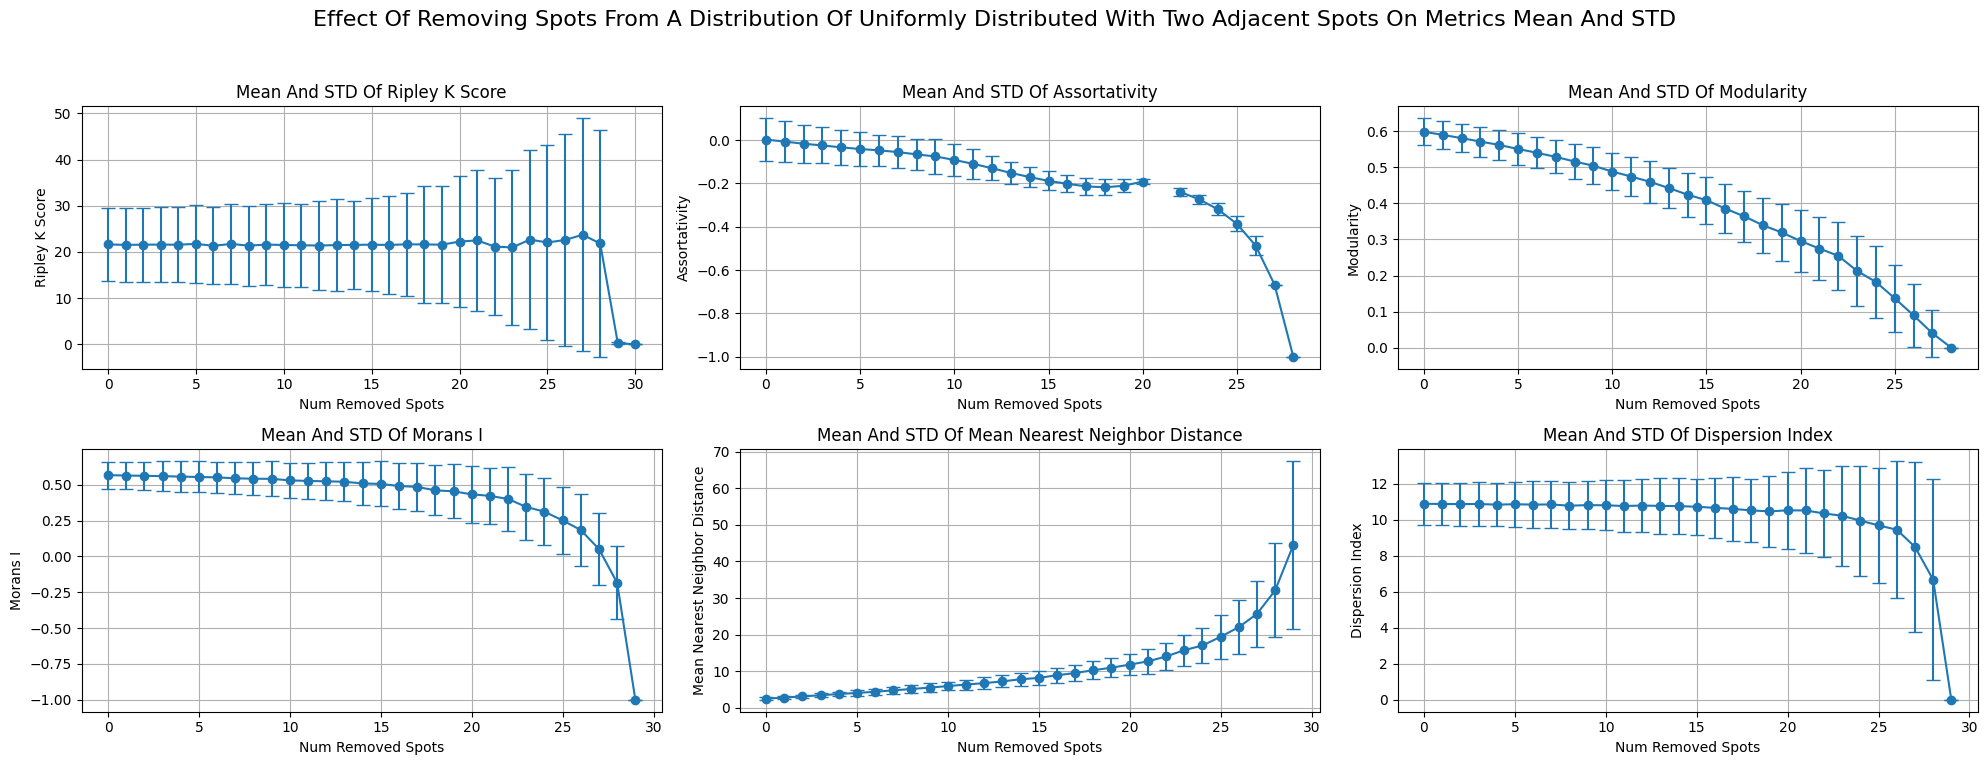

In [4]:
import matplotlib.pyplot as plt

# Define the columns to plot
columns_to_plot = [
    'ripley_k_score', 'assortativity', 'modularity', 'morans_i', 
    'mean_nearest_neighbor_distance', 'dispersion_index'
]

# Calculate the mean and std for each 'num_removed_spots'
grouped_data = new_df.groupby('num_removed_spots')[columns_to_plot].agg(['mean', 'std'])

# Create separate plots for each column in a 2x3 grid
fig, axes = plt.subplots(2, 3, figsize=(20, 8))
axes = axes.flatten()

# Define a helper function to format the labels and titles
def format_label(text):
    return ' '.join([word.capitalize() for word in text.replace('_', ' ').split()])

# Loop through each column to create subplots
for i, column in enumerate(columns_to_plot):
    ax = axes[i]
    ax.errorbar(
        grouped_data.index,
        grouped_data[(column, 'mean')],
        yerr=grouped_data[(column, 'std')],
        fmt='o-', capsize=5
    )
    ax.set_xlabel(format_label('num_removed_spots'))
    ax.set_ylabel(format_label(column))
    ax.set_title(f'Mean And STD Of {format_label(column)}')
    ax.grid(True)

# Hide the last subplot if columns_to_plot is not a multiple of 2
if len(columns_to_plot) % 2 != 0:
    fig.delaxes(axes[-1])

# Set the main title
fig.suptitle(
    "Effect Of Removing Spots From A Distribution Of Uniformly Distributed With Two Adjacent Spots On Metrics Mean And STD", 
    fontsize=16
)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to make space for the title
plt.show()


# Uniform Distribution

In [5]:
import pandas as pd
import pickle
from concurrent.futures import ThreadPoolExecutor

# Load the file
file_path = '/data/krishnendu/ripley_paper/generated_spots_analysis/generated_spots_analysis/results_for_uniform_ellipse_locations_dict.pkl'

with open(file_path, 'rb') as file:
    data = pickle.load(file)

# Define the columns for the new dataframe
columns = [
    'distribution', 'num_removed_spots', 'ripley_k_score', 'assortativity',
    'modularity', 'morans_i', 'mean_nearest_neighbor_distance',
    'pair_correlation_function', 'spot_density', 'local_clustering_coefficient',
    'dispersion_index'
]

# Function to process each entry
def process_entry(num_removed_spots, distribution):
    entry = data.loc[num_removed_spots, distribution]
    num_removed = int(num_removed_spots.split('_')[1])  # Extract the number of removed spots from the index
    
    # Extract the required values
    ripley_k_score = entry['ripley_k_score'][0] if 'ripley_k_score' in entry else None
    assortativity = entry.get('assortativity', None)
    modularity = entry.get('modularity', None)
    morans_i = entry.get('morans_i', None)
    mean_nearest_neighbor_distance = entry.get('mean_nearest_neighbor_distance', None)
    pair_correlation_function = entry['pair_correlation_function'][1] if 'pair_correlation_function' in entry else None
    spot_density = entry.get('spot_density', None)
    local_clustering_coefficient = entry.get('local_clustering_coefficient', None)
    dispersion_index = entry.get('dispersion_index', None)
    
    return [
        distribution, num_removed, ripley_k_score, assortativity,
        modularity, morans_i, mean_nearest_neighbor_distance,
        pair_correlation_function, spot_density, local_clustering_coefficient,
        dispersion_index
    ]

# Initialize an empty list to hold the new data
new_data = []

# Use ThreadPoolExecutor to run the process_entry function in parallel
with ThreadPoolExecutor() as executor:
    futures = []
    for num_removed_spots in data.index:
        for distribution in data.columns:
            futures.append(executor.submit(process_entry, num_removed_spots, distribution))
    
    for future in futures:
        new_data.append(future.result())

# Create the new dataframe
new_df = pd.DataFrame(new_data, columns=columns)


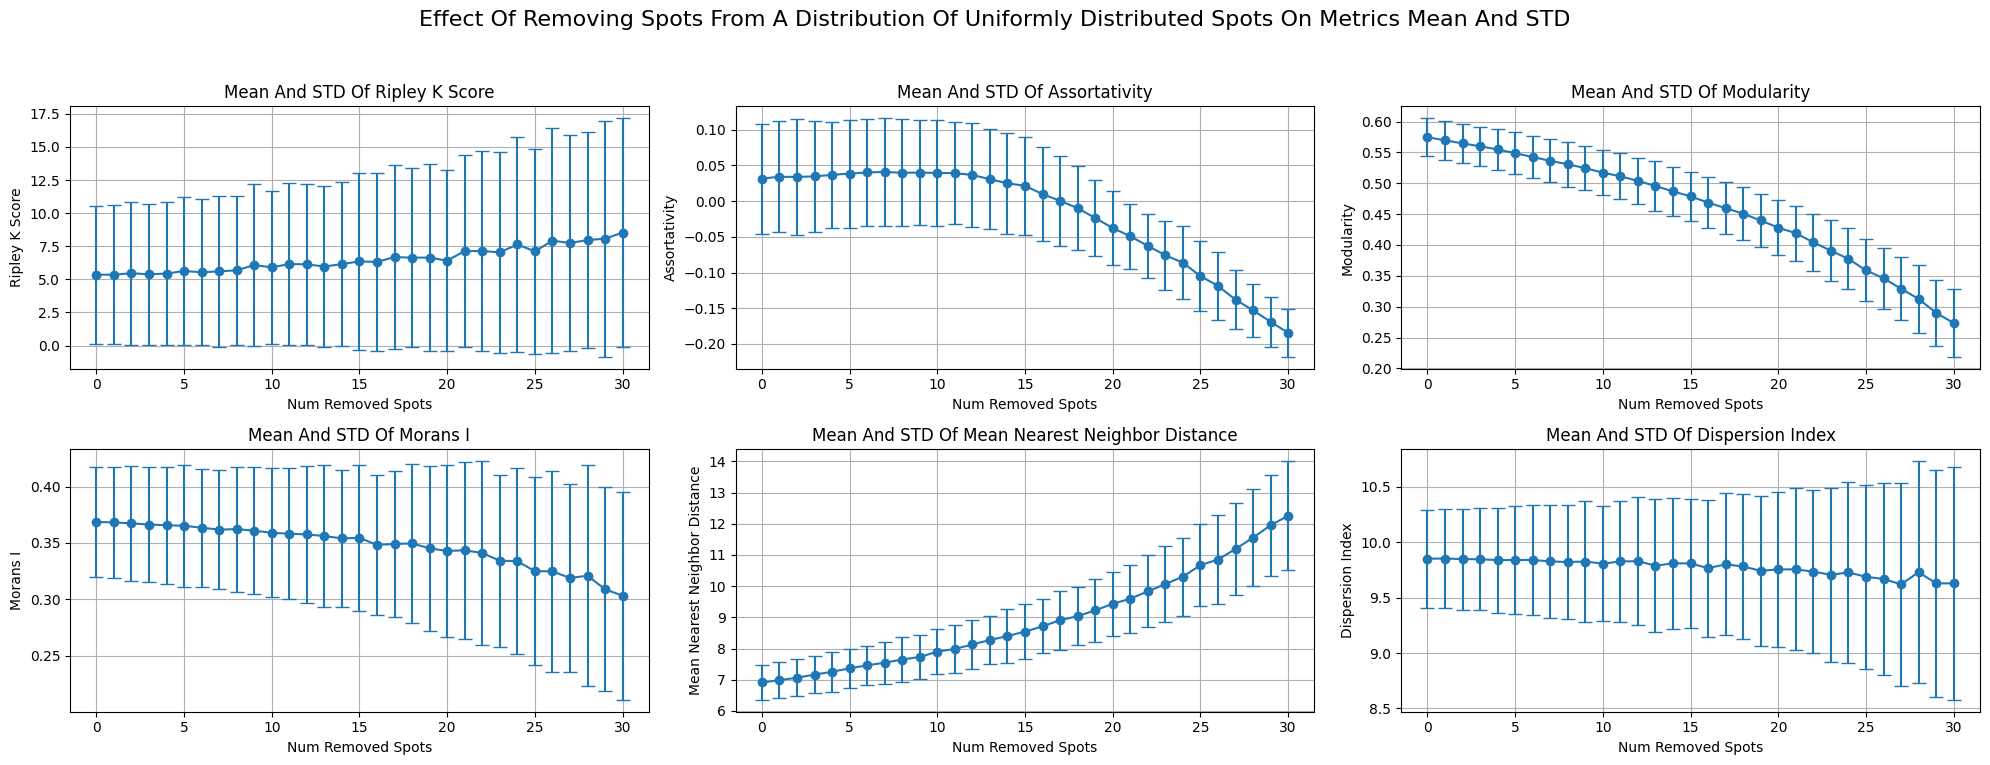

In [6]:
import matplotlib.pyplot as plt

# Define the columns to plot
columns_to_plot = [
    'ripley_k_score', 'assortativity', 'modularity', 'morans_i', 
    'mean_nearest_neighbor_distance', 'dispersion_index'
]

# Calculate the mean and std for each 'num_removed_spots'
grouped_data = new_df.groupby('num_removed_spots')[columns_to_plot].agg(['mean', 'std'])

# Create separate plots for each column in a 2x4 grid
fig, axes = plt.subplots(2, 3, figsize=(20, 8))
axes = axes.flatten()

# Define a helper function to format the labels and titles
def format_label(text):
    return ' '.join([word.capitalize() for word in text.replace('_', ' ').split()])

# Loop through each column to create subplots
for i, column in enumerate(columns_to_plot):
    ax = axes[i]
    ax.errorbar(
        grouped_data.index,
        grouped_data[(column, 'mean')],
        yerr=grouped_data[(column, 'std')],
        fmt='o-', capsize=5
    )
    ax.set_xlabel(format_label('num_removed_spots'))
    ax.set_ylabel(format_label(column))
    ax.set_title(f'Mean And STD Of {format_label(column)}')
    ax.grid(True)

# Hide the last subplot if columns_to_plot is not a multiple of 2
if len(columns_to_plot) % 2 != 0:
    fig.delaxes(axes[-1])

# Set the main title
fig.suptitle(
    "Effect Of Removing Spots From A Distribution Of Uniformly Distributed Spots On Metrics Mean And STD", 
    fontsize=16
)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to make space for the title
plt.show()


# Three Adjacent Spots

In [7]:

# Load the file
file_path = '/data/krishnendu/ripley_paper/generated_spots_analysis/generated_spots_analysis/results_for_uniform_3adj_spot_locations_dict.pkl'

with open(file_path, 'rb') as file:
    data = pickle.load(file)

# Define the columns for the new dataframe
columns = [
    'distribution', 'num_removed_spots', 'ripley_k_score', 'assortativity',
    'modularity', 'morans_i', 'mean_nearest_neighbor_distance',
    'pair_correlation_function', 'spot_density', 'local_clustering_coefficient',
    'dispersion_index'
]

# Function to process each entry
def process_entry(num_removed_spots, distribution):
    entry = data.loc[num_removed_spots, distribution]
    num_removed = int(num_removed_spots.split('_')[1])  # Extract the number of removed spots from the index
    
    # Extract the required values
    ripley_k_score = entry['ripley_k_score'][0] if 'ripley_k_score' in entry else None
    assortativity = entry.get('assortativity', None)
    modularity = entry.get('modularity', None)
    morans_i = entry.get('morans_i', None)
    mean_nearest_neighbor_distance = entry.get('mean_nearest_neighbor_distance', None)
    pair_correlation_function = entry['pair_correlation_function'][1] if 'pair_correlation_function' in entry else None
    spot_density = entry.get('spot_density', None)
    local_clustering_coefficient = entry.get('local_clustering_coefficient', None)
    dispersion_index = entry.get('dispersion_index', None)
    
    return [
        distribution, num_removed, ripley_k_score, assortativity,
        modularity, morans_i, mean_nearest_neighbor_distance,
        pair_correlation_function, spot_density, local_clustering_coefficient,
        dispersion_index
    ]

# Initialize an empty list to hold the new data
new_data = []

# Use ThreadPoolExecutor to run the process_entry function in parallel
with ThreadPoolExecutor() as executor:
    futures = []
    for num_removed_spots in data.index:
        for distribution in data.columns:
            futures.append(executor.submit(process_entry, num_removed_spots, distribution))
    
    for future in futures:
        new_data.append(future.result())

# Create the new dataframe
new_df = pd.DataFrame(new_data, columns=columns)


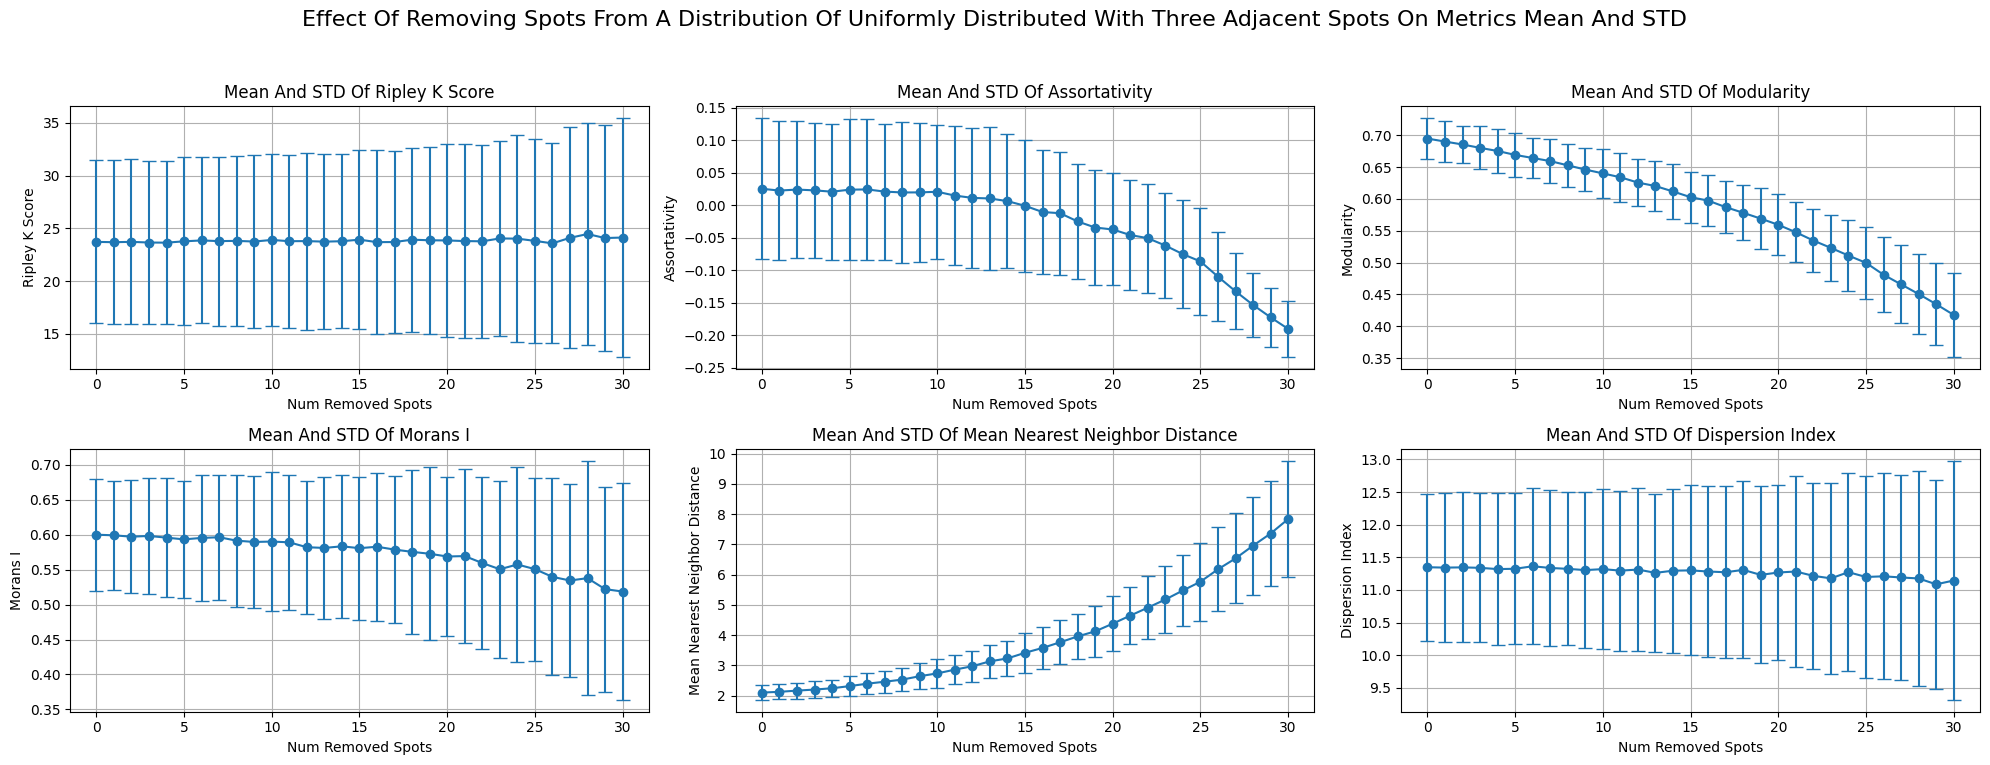

In [8]:
import matplotlib.pyplot as plt

# Define the columns to plot
columns_to_plot = [
    'ripley_k_score', 'assortativity', 'modularity', 'morans_i', 
    'mean_nearest_neighbor_distance', 'dispersion_index'
]

# Calculate the mean and std for each 'num_removed_spots'
grouped_data = new_df.groupby('num_removed_spots')[columns_to_plot].agg(['mean', 'std'])

# Create separate plots for each column in a 2x4 grid
fig, axes = plt.subplots(2, 3, figsize=(20, 8))
axes = axes.flatten()

# Define a helper function to format the labels and titles
def format_label(text):
    return ' '.join([word.capitalize() for word in text.replace('_', ' ').split()])

# Loop through each column to create subplots
for i, column in enumerate(columns_to_plot):
    ax = axes[i]
    ax.errorbar(
        grouped_data.index,
        grouped_data[(column, 'mean')],
        yerr=grouped_data[(column, 'std')],
        fmt='o-', capsize=5
    )
    ax.set_xlabel(format_label('num_removed_spots'))
    ax.set_ylabel(format_label(column))
    ax.set_title(f'Mean And STD Of {format_label(column)}')
    ax.grid(True)

# Hide the last subplot if columns_to_plot is not a multiple of 2
if len(columns_to_plot) % 2 != 0:
    fig.delaxes(axes[-1])

# Set the main title
fig.suptitle(
    "Effect Of Removing Spots From A Distribution Of Uniformly Distributed With Three Adjacent Spots On Metrics Mean And STD", 
    fontsize=16
)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to make space for the title
plt.show()


# Single Gaussian

In [9]:

# Load the file
file_path = '/data/krishnendu/ripley_paper/generated_spots_analysis/generated_spots_analysis/results_for_single_gaussian_locations_dict.pkl'

with open(file_path, 'rb') as file:
    data = pickle.load(file)

# Define the columns for the new dataframe
columns = [
    'distribution', 'num_removed_spots', 'ripley_k_score', 'assortativity',
    'modularity', 'morans_i', 'mean_nearest_neighbor_distance',
    'pair_correlation_function', 'spot_density', 'local_clustering_coefficient',
    'dispersion_index'
]

# Function to process each entry
def process_entry(num_removed_spots, distribution):
    entry = data.loc[num_removed_spots, distribution]
    num_removed = int(num_removed_spots.split('_')[1])  # Extract the number of removed spots from the index
    
    # Extract the required values
    ripley_k_score = entry['ripley_k_score'][0] if 'ripley_k_score' in entry else None
    assortativity = entry.get('assortativity', None)
    modularity = entry.get('modularity', None)
    morans_i = entry.get('morans_i', None)
    mean_nearest_neighbor_distance = entry.get('mean_nearest_neighbor_distance', None)
    pair_correlation_function = entry['pair_correlation_function'][1] if 'pair_correlation_function' in entry else None
    spot_density = entry.get('spot_density', None)
    local_clustering_coefficient = entry.get('local_clustering_coefficient', None)
    dispersion_index = entry.get('dispersion_index', None)
    
    return [
        distribution, num_removed, ripley_k_score, assortativity,
        modularity, morans_i, mean_nearest_neighbor_distance,
        pair_correlation_function, spot_density, local_clustering_coefficient,
        dispersion_index
    ]

# Initialize an empty list to hold the new data
new_data = []

# Use ThreadPoolExecutor to run the process_entry function in parallel
with ThreadPoolExecutor() as executor:
    futures = []
    for num_removed_spots in data.index:
        for distribution in data.columns:
            futures.append(executor.submit(process_entry, num_removed_spots, distribution))
    
    for future in futures:
        new_data.append(future.result())

# Create the new dataframe
new_df = pd.DataFrame(new_data, columns=columns)


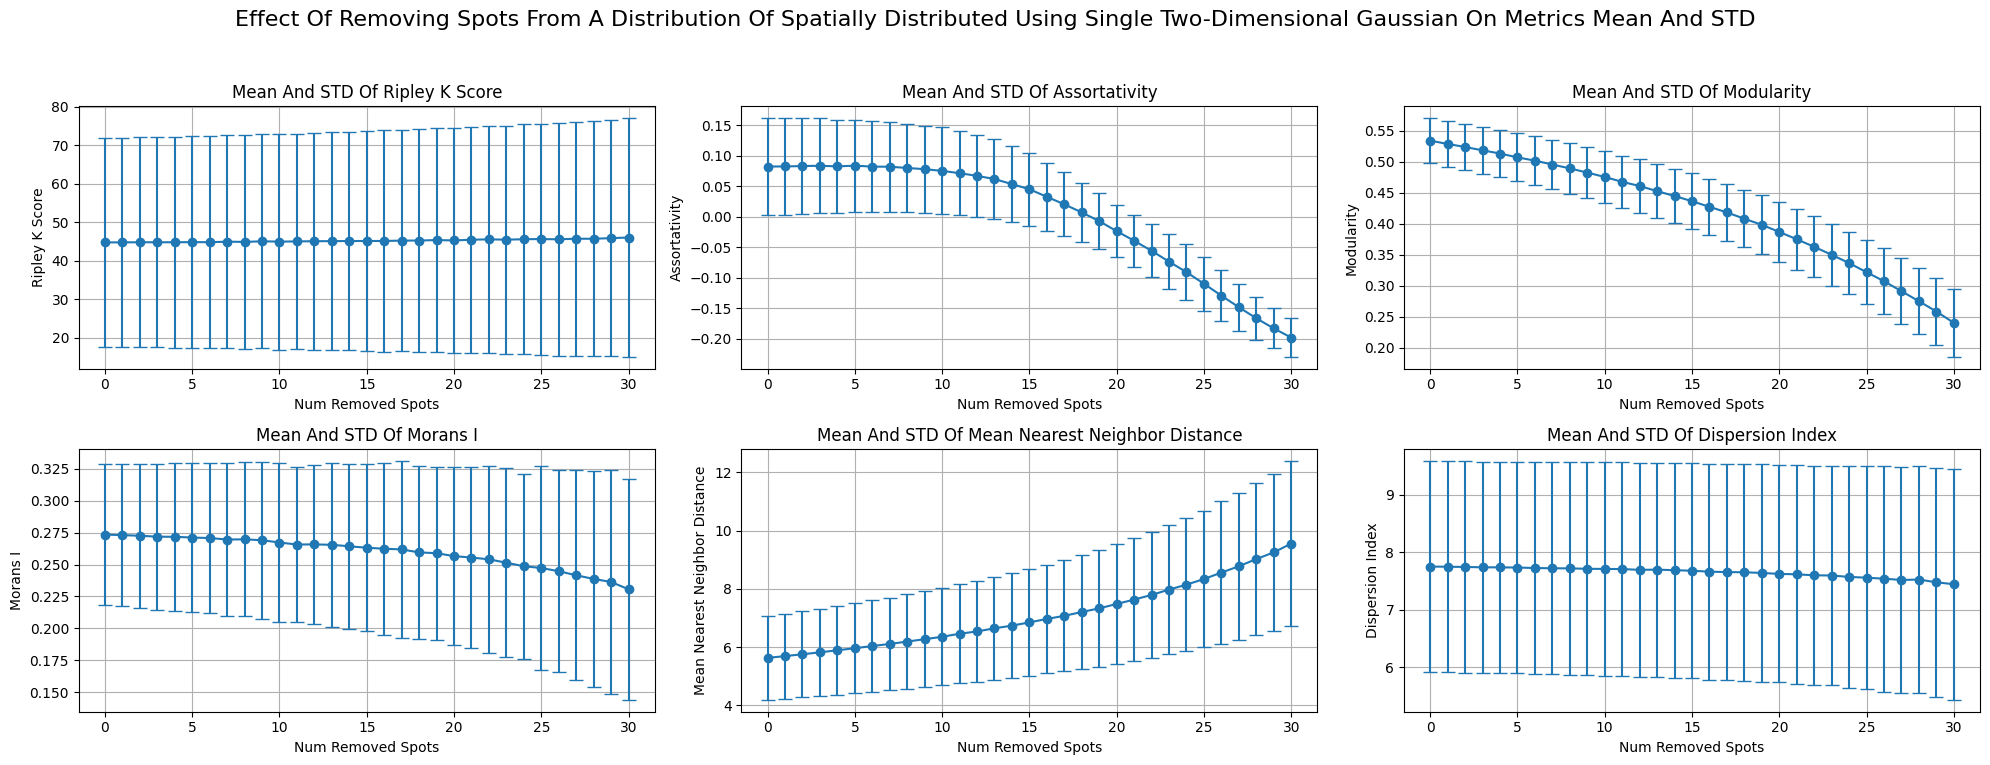

In [10]:
import matplotlib.pyplot as plt

# Define the columns to plot
columns_to_plot = [
    'ripley_k_score', 'assortativity', 'modularity', 'morans_i', 
    'mean_nearest_neighbor_distance', 'dispersion_index'
]

# Calculate the mean and std for each 'num_removed_spots'
grouped_data = new_df.groupby('num_removed_spots')[columns_to_plot].agg(['mean', 'std'])

# Create separate plots for each column in a 2x4 grid
fig, axes = plt.subplots(2, 3, figsize=(20, 8))
axes = axes.flatten()

# Define a helper function to format the labels and titles
def format_label(text):
    return ' '.join([word.capitalize() for word in text.replace('_', ' ').split()])

# Loop through each column to create subplots
for i, column in enumerate(columns_to_plot):
    ax = axes[i]
    ax.errorbar(
        grouped_data.index,
        grouped_data[(column, 'mean')],
        yerr=grouped_data[(column, 'std')],
        fmt='o-', capsize=5
    )
    ax.set_xlabel(format_label('num_removed_spots'))
    ax.set_ylabel(format_label(column))
    ax.set_title(f'Mean And STD Of {format_label(column)}')
    ax.grid(True)

# Hide the last subplot if columns_to_plot is not a multiple of 2
if len(columns_to_plot) % 2 != 0:
    fig.delaxes(axes[-1])

# Set the main title
fig.suptitle(
    "Effect Of Removing Spots From A Distribution Of Spatially Distributed Using Single Two-Dimensional Gaussian On Metrics Mean And STD", 
    fontsize=16
)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to make space for the title
plt.show()


In [3]:
scr_ncaph2 = pd.read_pickle('/data/krishnendu/ripley_paper/generated_spots_analysis/new_updated_two_genes_df.pkl')

In [4]:
scr_ncaph2.columns

Index(['column', 'row', 'field_index', 'cell_index', 'area', 'mean_intensity',
       'perimeter', 'solidity', 'imaging_barcode', 'spots_path', 'masks_path',
       'nuceli_path', 'biological_replicate', 'distance_matrix',
       'spot_coordinates', 'spot_radial_distances', 'spot_intensity_info',
       'ripley_no_correction', 'ripley_no_correction_diff',
       'clustering_percentage', 'ripley_max_derivative', 'clustering_area',
       'dispersion_area', 'ripley_ripley_correction', 'H_ripley_correction',
       'L_ripley_correction', 'ripley_r_correction_diff', 'ripley_max_radius',
       'clustering_percentage_r_correction',
       'ripley_max_derivative_r_correction', 'clustering_area_r_correction',
       'dispersion_area_r_correction', 'mean_radial_distance', 'spots_number',
       'imaging_well', 'gene_symbol', 'flattened_distances',
       'ripley_k_score_1', 'ripley_k_score_2', 'ripley_k_score_3',
       'ripley_k_score_4', 'assortativity', 'modularity', 'morans_i',
       'mea

In [5]:
scr_ncaph2 = scr_ncaph2[[ 'area', 'mean_intensity', 'perimeter', 
'mean_radial_distance', 'spots_number', 'gene_symbol', 'ripley_k_score_1', 'assortativity', 'modularity', 'morans_i',
'mean_nearest_neighbor_distance', 'spot_density','edge_density','dispersion_index']]

In [6]:
scr_ncaph2.rename(columns={'ripley_k_score_1': 'ripley_k_score'}, inplace=True)

In [130]:
scr_ncaph2['gene_symbol'] = scr_ncaph2['gene_symbol'].replace({
    'NCAPH2': 'siNCAPH2',
    'siScrambled': 'Control'
})


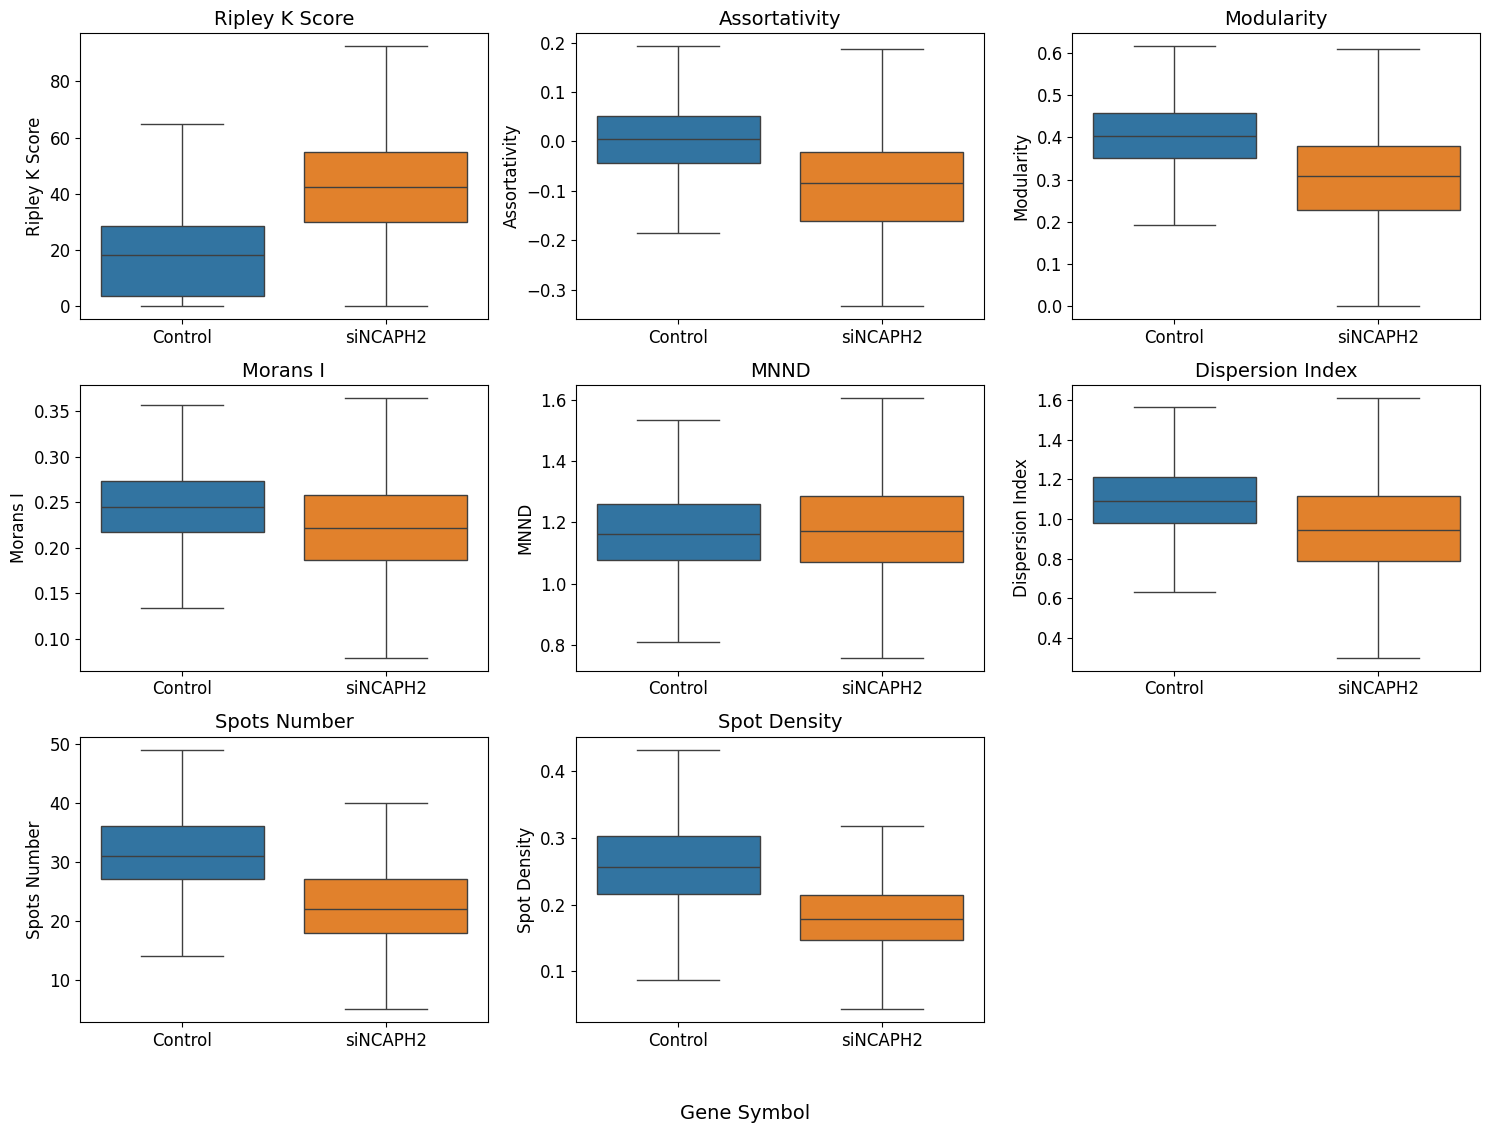

In [132]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming scr_ncaph2 DataFrame is already loaded and contains the necessary columns

# Define the columns to plot
columns_to_plot = ['ripley_k_score', 'assortativity', 'modularity', 'morans_i', 'MNND', 'dispersion_index', 'spots_number', 'spot_density']

def format_label(text):
    if text == 'MNND':
        return text
    return ' '.join([word.capitalize() for word in text.replace('_', ' ').split()])

# Reverse the order of gene_symbol categories
scr_ncaph2['gene_symbol'] = pd.Categorical(
    scr_ncaph2['gene_symbol'], 
    categories=sorted(scr_ncaph2['gene_symbol'].unique()),
    ordered=True
)

# Create the box plots for each column
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
axes = axes.flatten()

# Loop through each column to create subplots
for i, column in enumerate(columns_to_plot):
    ax = axes[i]
    sns.boxplot(
        x='gene_symbol', y=column, data=scr_ncaph2, ax=ax, showfliers=False, 
        hue='gene_symbol', palette=['#1f77b4', '#ff7f0e'], dodge=False
    )
    ax.set_title(format_label(column), fontsize=14)  # Increase title font size
    ax.set_ylabel(format_label(column), fontsize=12)
    ax.set_xlabel('')  # Suppress individual x-axis labels
    
    # Increase the font size of tick labels
    ax.tick_params(axis='x', labelsize=12)  # x-axis tick labels
    ax.tick_params(axis='y', labelsize=12)  # y-axis tick labels

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Set a shared xlabel for the entire figure
fig.supxlabel('Gene Symbol', fontsize=14)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to make space for the title
plt.show()


In [9]:
scr_ncaph2.rename(columns={'mean_nearest_neighbor_distance': 'MNND'}, inplace=True)


/tmp/ipykernel_6551/1597841247.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


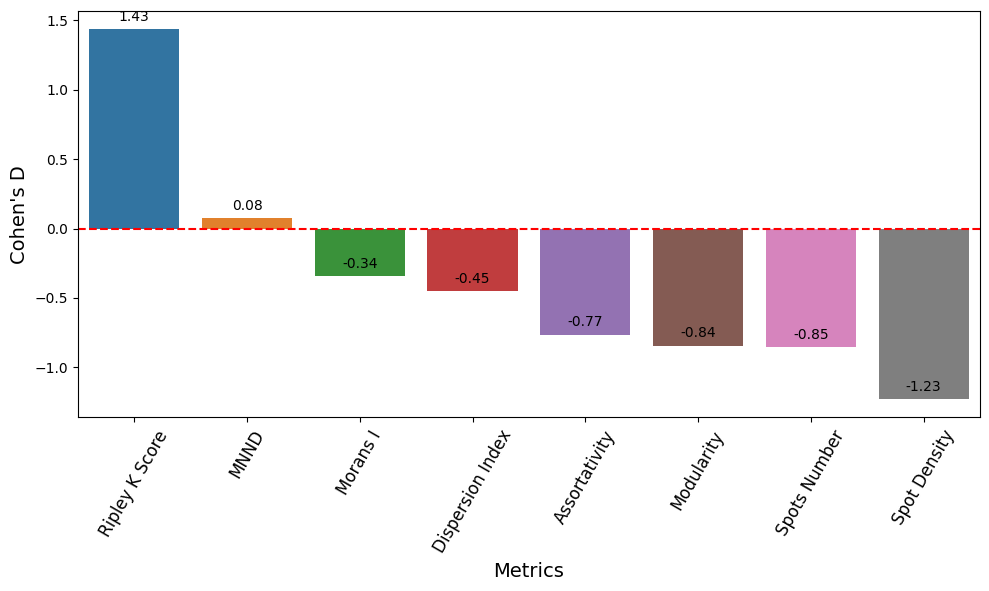

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings

# Suppress specific FutureWarning and UserWarning messages
warnings.filterwarnings("ignore", category=FutureWarning, module='seaborn')
warnings.filterwarnings("ignore", category=UserWarning, module='seaborn')

# Define the columns to plot
columns_to_plot = ['ripley_k_score','assortativity', 'modularity', 'morans_i', 'MNND', 'dispersion_index','spots_number', 'spot_density']

def format_label(text):
    if text == 'MNND':
        return text
    return ' '.join([word.capitalize() for word in text.replace('_', ' ').split()])


# Separate the data into two groups based on gene_symbol
group1 = scr_ncaph2[scr_ncaph2['gene_symbol'] == scr_ncaph2['gene_symbol'].unique()[0]]
group2 = scr_ncaph2[scr_ncaph2['gene_symbol'] == scr_ncaph2['gene_symbol'].unique()[1]]

def cohen_d(group1, group2):
    """Calculate Cohen's d."""
    diff_mean = np.mean(group1) - np.mean(group2)
    pooled_std = np.sqrt((np.std(group1, ddof=1) ** 2 + np.std(group2, ddof=1) ** 2) / 2)
    return diff_mean / pooled_std

# Calculate Cohen's d for each metric
effect_sizes = {}
for column in columns_to_plot:
    d = cohen_d(group1[column], group2[column])
    effect_sizes[column] = d

# Convert effect sizes to a DataFrame for plotting
effect_sizes_df = pd.DataFrame.from_dict(effect_sizes, orient='index', columns=['Cohen_d'])

# Sort the effect sizes from highest to lowest
effect_sizes_df = effect_sizes_df.sort_values(by='Cohen_d', ascending=False)


# Apply formatting to the index of the effect_sizes_df for display
effect_sizes_df.index = [format_label(col) for col in effect_sizes_df.index]

# Plot the effect sizes
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x=effect_sizes_df.index, 
    y='Cohen_d', 
    data=effect_sizes_df.reset_index(), 
    palette=sns.color_palette("tab10")[:len(effect_sizes_df)]
)
plt.xticks(rotation=60, fontsize=12)
# plt.title("Comparison of Metrics for Centromere Clustering Using Cohen’s D", fontsize=16)
plt.xlabel('Metrics', fontsize=14)
plt.ylabel("Cohen's D", fontsize=14)
plt.axhline(y=0, color='r', linestyle='--')

# Annotate each bar with its value
for p in ax.patches:
    ax.annotate(f"{p.get_height():.2f}", 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 9), 
                textcoords='offset points', fontsize=10)

plt.tight_layout()
plt.show()



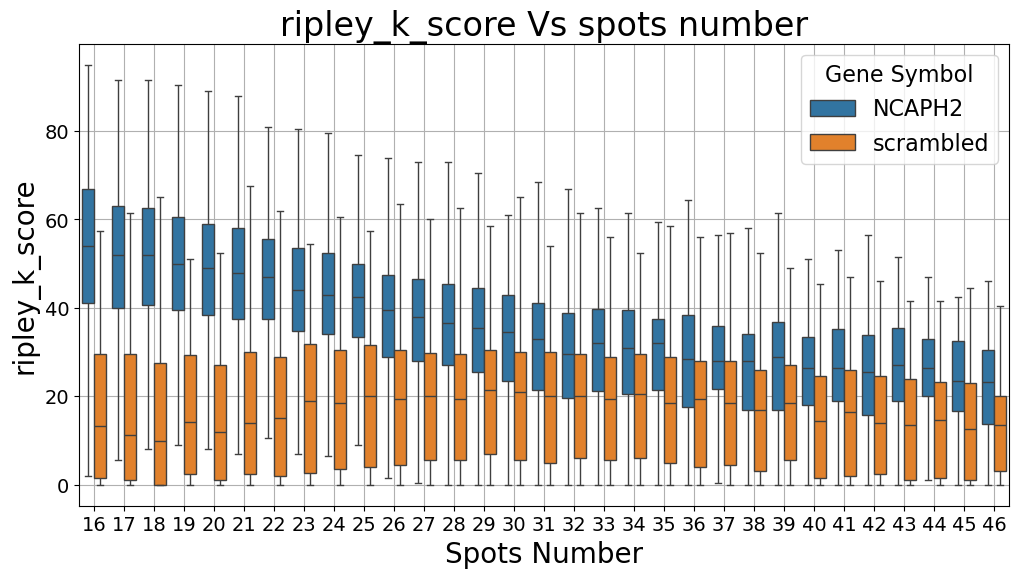

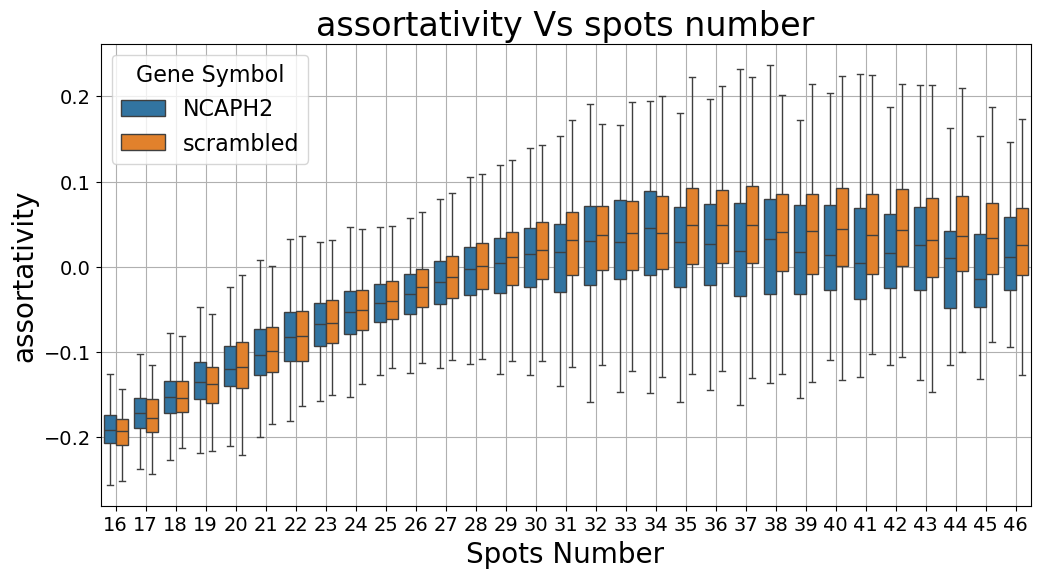

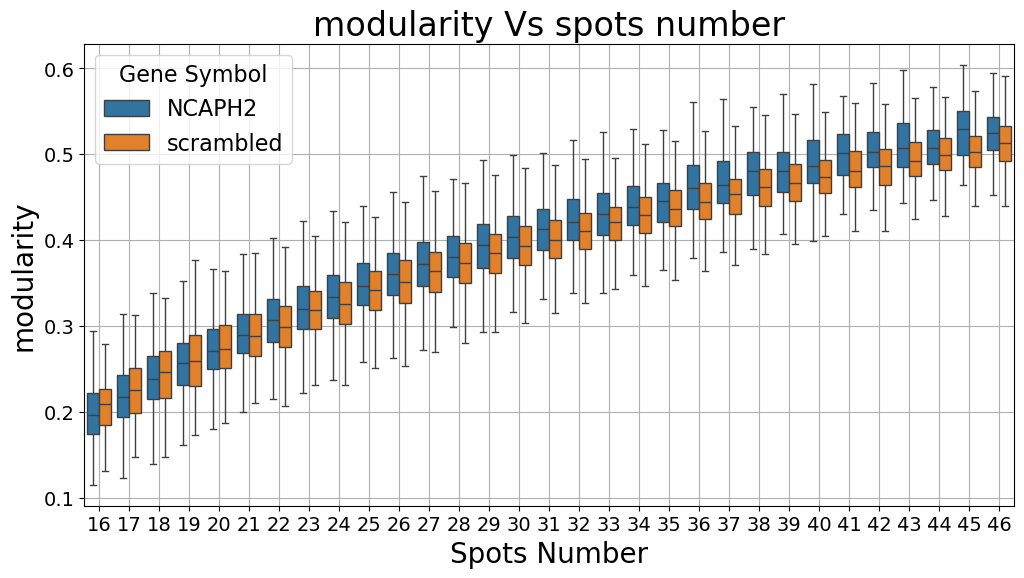

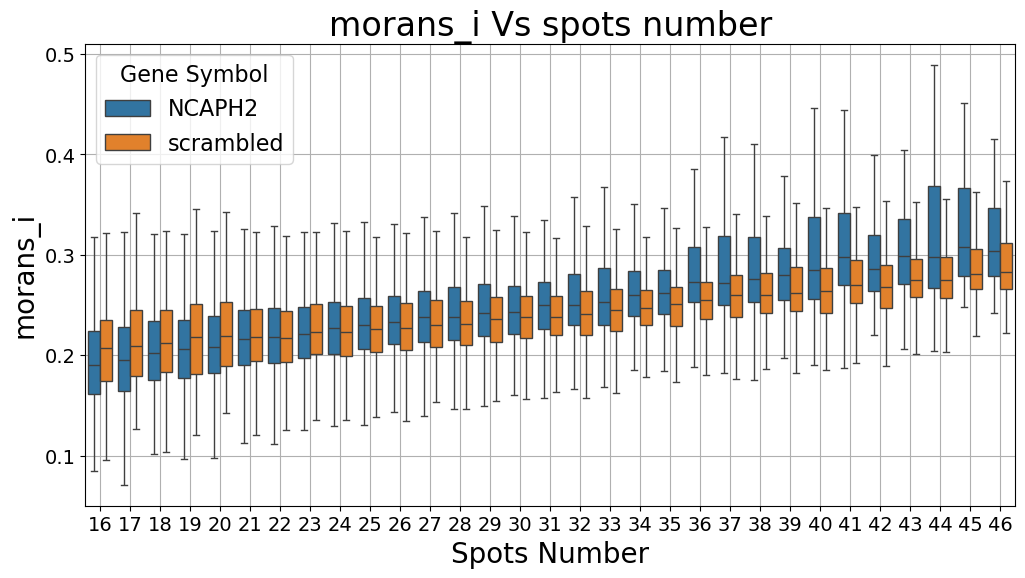

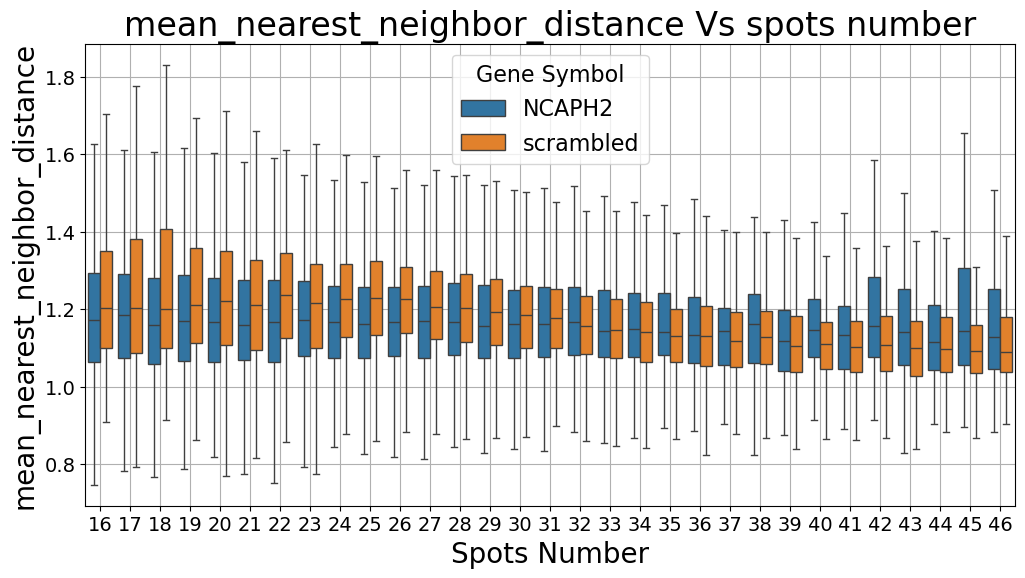

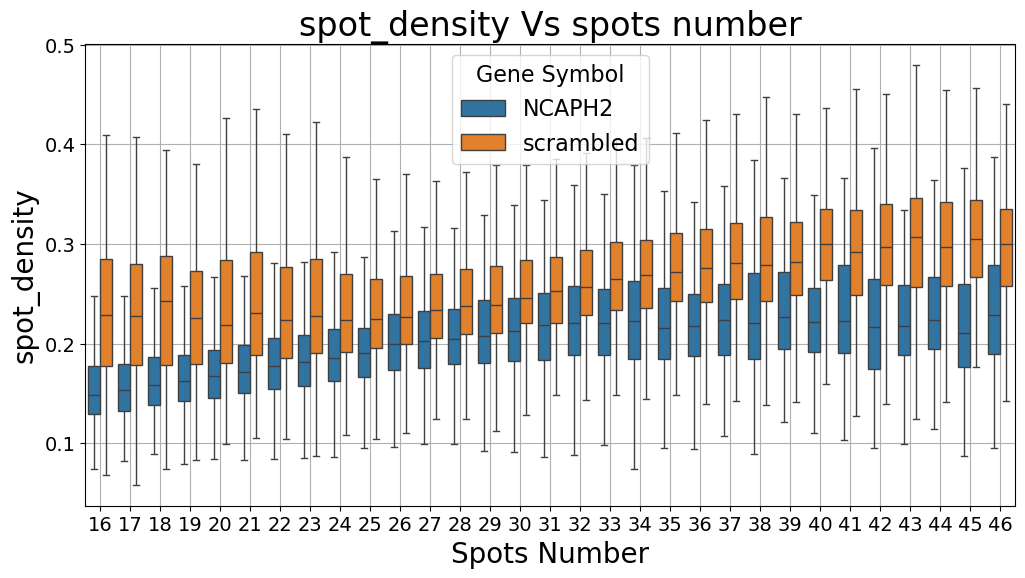

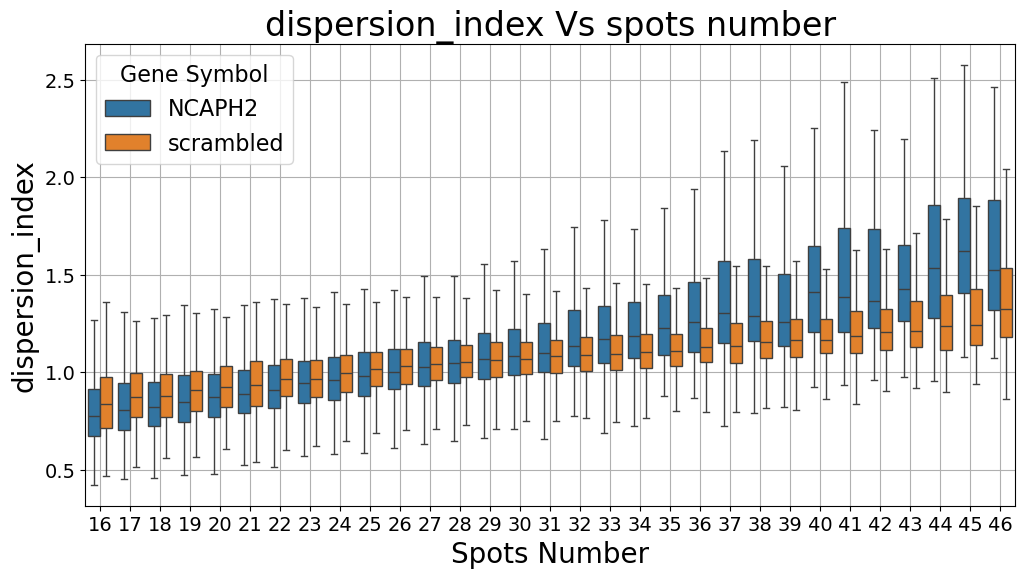

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming scr_ncaph2 is your dataframe
metrics = [
    'ripley_k_score', 'assortativity', 'modularity', 
    'morans_i', 'mean_nearest_neighbor_distance', 'spot_density', 'dispersion_index'
]

# Convert spots_number to integer
scr_ncaph2['spots_number'] = scr_ncaph2['spots_number'].astype(int)

# Filter the dataframe to include only spots_number between 16 and 46
filtered_df = scr_ncaph2[(scr_ncaph2['spots_number'] >= 16) & (scr_ncaph2['spots_number'] <= 46)]

# Set larger font sizes
title_fontsize = 24
label_fontsize = 20
legend_fontsize = 16
tick_fontsize = 14

for metric in metrics:
    plt.figure(figsize=(12, 6))
    sns.boxplot(
        x='spots_number',
        y=metric,
        hue='gene_symbol',
        data=filtered_df,
        showfliers=False
    )
    plt.title(f'{metric} Vs spots number', fontsize=title_fontsize)
    plt.xlabel('Spots Number', fontsize=label_fontsize)
    plt.ylabel(metric, fontsize=label_fontsize)
    plt.xticks(fontsize=tick_fontsize)
    plt.yticks(fontsize=tick_fontsize)
    plt.legend(title='Gene Symbol', fontsize=legend_fontsize, title_fontsize=legend_fontsize)
    plt.grid(True)
    plt.show()


In [15]:
import pandas as pd
import pickle
import glob
import os
from concurrent.futures import ThreadPoolExecutor

# Define the directory containing the files
directory = '/data/krishnendu/ripley_paper/generated_spots_analysis/generated_spots_analysis/'

# List all .pkl files in the directory
file_paths = glob.glob(os.path.join(directory, '*.pkl'))

# Define the columns for the new dataframe
columns = [
    'distribution', 'num_removed_spots', 'ripley_k_score', 'assortativity',
    'modularity', 'morans_i', 'MNND',
    'pair_correlation_function', 'spot_density', 'local_clustering_coefficient',
    'dispersion_index']

# Function to process each entry
def process_entry(num_removed_spots, distribution, data):
    entry = data.loc[num_removed_spots, distribution]
    num_removed = int(num_removed_spots.split('_')[1])  # Extract the number of removed spots from the index
    
    # Extract the required values
    ripley_k_score = entry['ripley_k_score'][0] if 'ripley_k_score' in entry else None
    assortativity = entry.get('assortativity', None)
    modularity = entry.get('modularity', None)
    morans_i = entry.get('morans_i', None)
    mean_nearest_neighbor_distance = entry.get('mean_nearest_neighbor_distance', None)
    pair_correlation_function = entry['pair_correlation_function'][1] if 'pair_correlation_function' in entry else None
    spot_density = entry.get('spot_density', None)
    local_clustering_coefficient = entry.get('local_clustering_coefficient', None)
    dispersion_index = entry.get('dispersion_index', None)
    
    return [
        distribution, num_removed, ripley_k_score, assortativity,
        modularity, morans_i, mean_nearest_neighbor_distance,
        pair_correlation_function, spot_density, local_clustering_coefficient,
        dispersion_index
    ]

# Initialize an empty list to hold the new data
all_data = []

# Process each file
for file_path in file_paths:
    with open(file_path, 'rb') as file:
        data = pickle.load(file)
    
    # Extract the distribution name from the filename
    distribution_name = os.path.basename(file_path).replace('results_for_', '').replace('_locations_dict.pkl', '')
    
    # Use ThreadPoolExecutor to run the process_entry function in parallel
    with ThreadPoolExecutor() as executor:
        futures = []
        for num_removed_spots in data.index:
            for distribution in data.columns:
                futures.append(executor.submit(process_entry, num_removed_spots, distribution, data))
        
        for future in futures:
            entry = future.result()
            entry.append(distribution_name)  # Add the distribution name to the entry
            all_data.append(entry)

# Create the new dataframe
final_columns = columns + ['distribution_profile']
final_df = pd.DataFrame(all_data, columns=final_columns)

final_df.rename(columns={'distribution_profile':'distribution_type'}, inplace=True)
final_df.loc[final_df['distribution_type']=='uniform_ellipse', 'distribution_type'] = 'uniform'
final_df.loc[final_df['distribution_type']=='results_locations_dispersed.pkl', 'distribution_type'] = 'dispersed'
final_df.loc[final_df['distribution_type']=='results_locations_dict_single_gaussian_with_nucleoli.pkl', 'distribution_type'] = 'gaussian_with_nucleoli'
final_df.loc[final_df['distribution_type']=='results_locations_dict_gmm_2modes_with_nucleoli.pkl', 'distribution_type'] = 'gmm_2modes_with_nucleoli'
final_df.loc[final_df['distribution_type']=='results_locations_dict_gmm_3modes.pkl', 'distribution_type'] = 'gmm_3modes'
final_df.loc[final_df['distribution_type']=='results_locations_dict_gmm_2modes.pkl', 'distribution_type'] = 'gmm_2modes'


# Save or use final_df as needed


/tmp/ipykernel_126519/3384670018.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipykernel_126519/3384670018.py:59: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(distribution_order, rotation=45, ha='right', fontsize=10)
/tmp/ipykernel_126519/3384670018.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipykernel_126519/3384670018.py:59: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(distribution_order, rotation=45, ha='right', fontsize=10)
/tmp/ipykernel_126519/3384670018.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in 

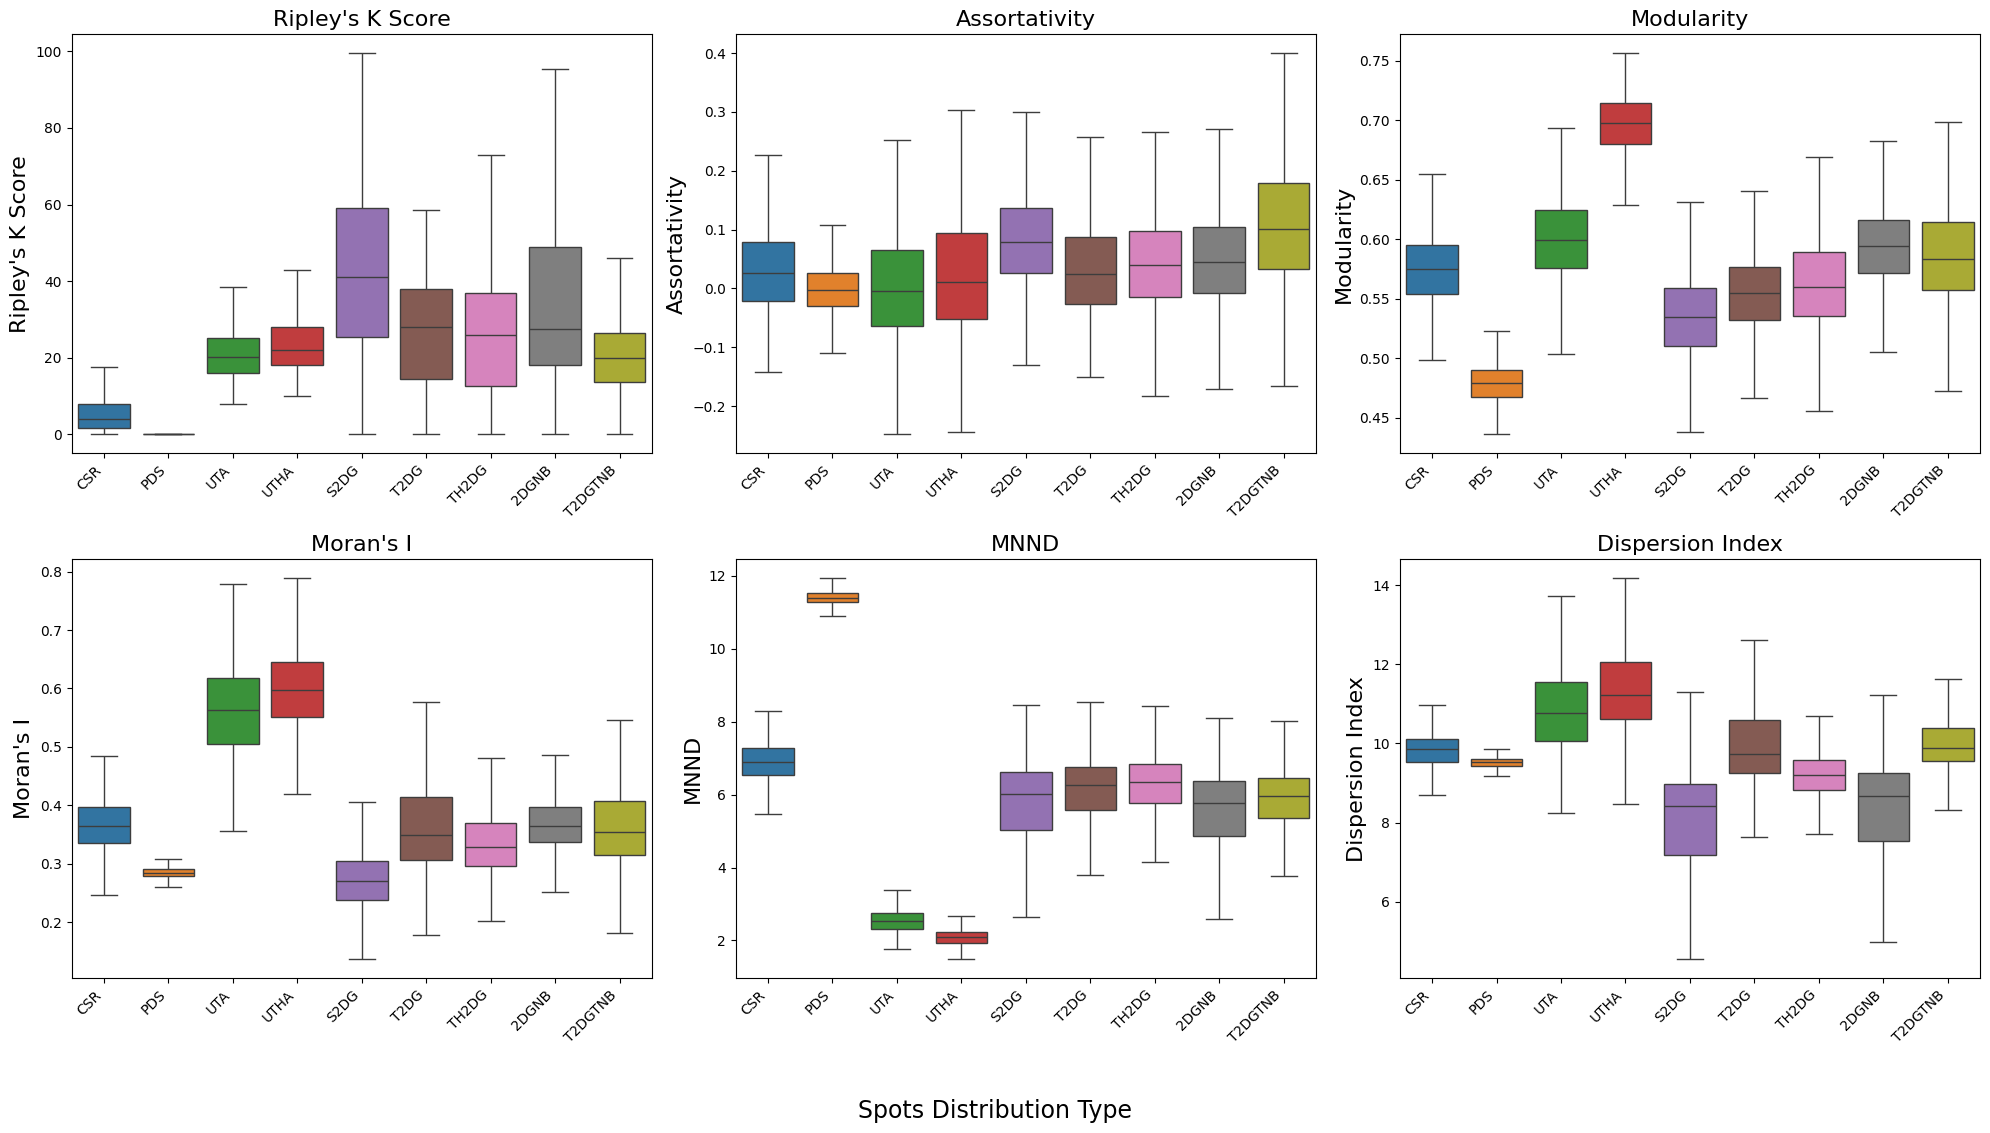

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Dictionary for renaming distribution types
methods_dict = {
    "uniform": "CSR",
    "dispersed": "PDS",
    "uniform_2adj_spot": "UTA",
    "uniform_3adj_spot": "UTHA",
    "single_gaussian": "S2DG",
    "gmm_2modes": "T2DG",
    "gmm_3modes": "TH2DG",
    "gaussian_with_nucleoli": "2DGNB",
    "gmm_2modes_with_nucleoli": "T2DGTNB"
}

# Define the columns to plot
columns_to_plot = [
    'ripley_k_score', 'assortativity', 'modularity', 
    'morans_i', 'MNND', 'dispersion_index'
]

# Helper function to format labels
def format_label(text):
    if (text=='MNND') or (text=='Normalized MSE') or (text=='KS Statistic'):
        return text
    if  (text=="ripley_k_score"):
        return "Ripley's K Score"
    if  (text=="morans_i"):
        return "Moran's I"
    return ' '.join([word.capitalize() for word in text.replace('_', ' ').split()])

# Filter the dataframe for the specified condition and map distribution_type to renamed values
final_df1 = final_df.loc[final_df['num_removed_spots'] == 0].copy()
final_df1['distribution_type'] = final_df1['distribution_type'].map(methods_dict)
distribution_order = list(methods_dict.values())

# Create box plots for each column
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 12))
axes = axes.flatten()

for i, column in enumerate(columns_to_plot):
    ax = axes[i]
    sns.boxplot(
        x='distribution_type', 
        y=column, 
        data=final_df1, 
        ax=ax, 
        showfliers=False, 
        palette=sns.color_palette("tab10")[:len(distribution_order)],
        order=distribution_order  # Set the order for x-axis
    )
    ax.set_title(format_label(column), fontsize=16)
    ax.set_xlabel('')  # Leave individual x-axis labels blank
    ax.set_ylabel(format_label(column), fontsize=16)

    # Format tick labels
    ax.set_xticklabels(distribution_order, rotation=45, ha='right', fontsize=10)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Add a shared x-label
fig.supxlabel('Spots Distribution Type', fontsize=17)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to make space for the title

plt.show()

In [92]:
from scipy.stats import shapiro, normaltest, anderson

# Function to test normality for a column
def test_normality(data, metric_column, group_column):
    """
    Test for normality of distributions for a given metric.
    """
    results = []
    groups = data[group_column].unique()
    
    for group in groups:
        group_data = data[data[group_column] == group][metric_column].dropna()
        
        # Shapiro-Wilk Test
        shapiro_stat, shapiro_p = shapiro(group_data)
        
        # D’Agostino and Pearson’s Test
        dagostino_stat, dagostino_p = normaltest(group_data)
        
        # Anderson-Darling Test
        anderson_result = anderson(group_data)
        
        results.append({
            'Metric': metric_column,
            'Group': group,
            'Shapiro Stat': shapiro_stat,
            'Shapiro p-value': shapiro_p,
            'D’Agostino Stat': dagostino_stat,
            'D’Agostino p-value': dagostino_p,
            'Anderson Stat': anderson_result.statistic,
            'Anderson Thresholds': anderson_result.critical_values,
            'Anderson Sig Levels': anderson_result.significance_level,
        })
    
    return pd.DataFrame(results)

# Apply the normality test for each metric
columns_to_test = [
    'ripley_k_score', 'assortativity', 'modularity', 
    'morans_i', 'MNND', 'dispersion_index'
]
results = []

for column in columns_to_test:
    result_df = test_normality(final_df1, column, 'distribution_type')
    results.append(result_df)

# Combine results into a single dataframe
final_results = pd.concat(results, ignore_index=True)

# Display the results


/home/nciadmin/anaconda3/envs/hitips_env/lib/python3.9/site-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/home/nciadmin/anaconda3/envs/hitips_env/lib/python3.9/site-packages/scipy/stats/_morestats.py:1879: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
/home/nciadmin/anaconda3/envs/hitips_env/lib/python3.9/site-packages/scipy/stats/_morestats.py:2121: RuntimeWarning: invalid value encountered in divide
  w = (y - xbar) / s
/home/nciadmin/anaconda3/envs/hitips_env/lib/python3.9/site-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/home/nciadmin/anaconda3/envs/hitips_env/lib/python3.9/site-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be acc

In [20]:
def check_normality(row):
    # Check Shapiro and D’Agostino tests
    shapiro_normal = row['Shapiro p-value'] > 0.05
    dagostino_normal = row['D’Agostino p-value'] > 0.05 if not pd.isnull(row['D’Agostino p-value']) else True
    
    # Check Anderson test
    anderson_normal = row['Anderson Stat'] <= row['Anderson Thresholds'][-1]  # Compare with 5% threshold
    
    # Overall decision
    is_normal = shapiro_normal and dagostino_normal and anderson_normal
    return 'Parametric' if is_normal else 'Non-parametric'

# Apply the function to the DataFrame
final_results['Normality'] = final_results.apply(check_normality, axis=1)

# View the updated DataFrame with Normality classification
final_results

,Metric,Group,Shapiro Stat,Shapiro p-value,D’Agostino Stat,D’Agostino p-value,Anderson Stat,Anderson Thresholds,Anderson Sig Levels,Normality
0,ripley_k_score,uniform_3adj_spot,0.921283,2.017729e-22,223.886284,2.419420e-49,18.725997,"[0.574, 0.653, 0.784, 0.914, 1.088]","[15.0, 10.0, 5.0, 2.5, 1.0]",Non-parametric
1,ripley_k_score,gaussian_with_nucleoli,0.872586,0.000000e+00,1317.809686,6.938453e-287,435.620973,"[0.576, 0.656, 0.787, 0.918, 1.092]","[15.0, 10.0, 5.0, 2.5, 1.0]",Non-parametric
2,ripley_k_score,dispersed,1.000000,1.000000e+00,NaN,NaN,NaN,"[0.574, 0.653, 0.784, 0.914, 1.088]","[15.0, 10.0, 5.0, 2.5, 1.0]",Non-parametric
3,ripley_k_score,uniform,0.871060,6.271748e-28,226.000234,8.407611e-50,35.245805,"[0.574, 0.653, 0.784, 0.914, 1.088]","[15.0, 10.0, 5.0, 2.5, 1.0]",Non-parametric
4,ripley_k_score,uniform_2adj_spot,0.921410,2.098036e-22,211.428364,1.227197e-46,19.025035,"[0.574, 0.653, 0.784, 0.914, 1.088]","[15.0, 10.0, 5.0, 2.5, 1.0]",Non-parametric
5,ripley_k_score,gmm_2modes_with_nucleoli,0.978385,2.725563e-36,290.528752,8.174914e-64,51.310419,"[0.576, 0.656, 0.787, 0.918, 1.092]","[15.0, 10.0, 5.0, 2.5, 1.0]",Non-parametric
6,ripley_k_score,single_gaussian,0.944960,0.000000e+00,576.048830,8.176849e-126,144.935105,"[0.576, 0.656, 0.787, 0.918, 1.092]","[15.0, 10.0, 5.0, 2.5, 1.0]",Non-parametric
7,ripley_k_score,gmm_2modes,0.960408,1.401298e-45,3296.311468,0.000000e+00,108.594793,"[0.576, 0.656, 0.787, 0.918, 1.092]","[15.0, 10.0, 5.0, 2.5, 1.0]",Non-parametric
8,ripley_k_score,gmm_3modes,0.974810,1.432669e-38,692.201274,4.902336e-151,53.957236,"[0.576, 0.656, 0.787, 0.918, 1.092]","[15.0, 10.0, 5.0, 2.5, 1.0]",Non-parametric
9,assortativity,uniform_3adj_spot,0.979989,1.708871e-10,51.842650,5.527280e-12,5.048628,"[0.574, 0.653, 0.784, 0.914, 1.088]","[15.0, 10.0, 5.0, 2.5, 1.0]",Non-parametric


In [25]:
from scipy.stats import kruskal, mannwhitneyu
from itertools import combinations
import pandas as pd
import numpy as np
from statsmodels.stats.multitest import multipletests

# Function to perform Kruskal-Wallis and pairwise Mann-Whitney U test
def analyze_metric_with_scipy(data, metric_column):
    results = {}
    groups = data['Group'].unique()
    
    # Get data for each group
    group_values = {group: data[data['Group'] == group][metric_column].dropna() for group in groups}
    
    # Kruskal-Wallis test
    kruskal_stat, kruskal_p = kruskal(*group_values.values())
    results['Kruskal-Wallis'] = {'stat': kruskal_stat, 'p-value': kruskal_p}
    
    # Pairwise Mann-Whitney U tests
    pairwise_results = []
    for (group1, group2) in combinations(groups, 2):
        stat, p_value = mannwhitneyu(group_values[group1], group_values[group2], alternative='two-sided')
        pairwise_results.append({'Group 1': group1, 'Group 2': group2, 'Stat': stat, 'p-value': p_value})
    
    # Correct for multiple comparisons using Bonferroni or Benjamini-Hochberg
    p_values = [res['p-value'] for res in pairwise_results]
    corrected_p_values = multipletests(p_values, method='bonferroni')[1]  # Use 'fdr_bh' for Benjamini-Hochberg
    
    # Add corrected p-values to the results
    for i, res in enumerate(pairwise_results):
        res['Corrected p-value'] = corrected_p_values[i]
    
    results['Pairwise Comparisons'] = pairwise_results
    
    return results

# Update the grouping column
group_column = 'distribution_type'  # Adjust based on your DataFrame structure

# Filter the data for the specific metric
metric_column = 'ripley_k_score'  # Example metric
metric_data = final_df1[[group_column, metric_column]].dropna()

# Analyze the metric
analysis_results = analyze_metric_with_scipy(metric_data.rename(columns={group_column: 'Group'}), metric_column)

# Display Results
print("Kruskal-Wallis Test:")
print(analysis_results['Kruskal-Wallis'])

print("\nPairwise Mann-Whitney U Test Results:")
pairwise_df = pd.DataFrame(analysis_results['Pairwise Comparisons'])
pairwise_df

Kruskal-Wallis Test:
{'stat': 10718.509841663346, 'p-value': 0.0}

Pairwise Mann-Whitney U Test Results:


,Group 1,Group 2,Stat,p-value,Corrected p-value
0,uniform_3adj_spot,gaussian_with_nucleoli,3861677.0,1.340249e-32,4.824896e-31
1,uniform_3adj_spot,dispersed,1000000.0,0.000000e+00,0.000000e+00
2,uniform_3adj_spot,uniform,980379.0,4.369070e-303,1.572865e-301
3,uniform_3adj_spot,uniform_2adj_spot,590914.0,1.890715e-12,6.806574e-11
4,uniform_3adj_spot,gmm_2modes_with_nucleoli,6026681.5,7.832852e-27,2.819827e-25
5,uniform_3adj_spot,single_gaussian,2382769.5,1.576993e-164,5.677174e-163
6,uniform_3adj_spot,gmm_2modes,4271469.5,2.754775e-14,9.917190e-13
7,uniform_3adj_spot,gmm_3modes,4603737.0,3.490517e-05,1.256586e-03
8,gaussian_with_nucleoli,dispersed,9980000.0,0.000000e+00,0.000000e+00
9,gaussian_with_nucleoli,uniform,9374554.0,0.000000e+00,0.000000e+00


In [26]:
from scipy.stats import kruskal, mannwhitneyu
from itertools import combinations
import pandas as pd
from statsmodels.stats.multitest import multipletests

# Function to analyze each metric separately
def analyze_metric(data, metric_column, group_column='distribution_type', alpha=0.05):
    """
    Perform Kruskal-Wallis and pairwise Mann-Whitney U tests for a specific metric.
    """
    results = []
    groups = data[group_column].unique()
    
    # Extract values for each group
    group_values = {group: data[data[group_column] == group][metric_column].dropna() for group in groups}
    
    # Kruskal-Wallis test for all groups
    kruskal_stat, kruskal_p = kruskal(*group_values.values())
    
    # Pairwise Mann-Whitney U test for each combination of groups
    pairwise_results = []
    for group1, group2 in combinations(groups, 2):
        stat, p_value = mannwhitneyu(group_values[group1], group_values[group2], alternative='two-sided')
        pairwise_results.append({
            'Metric': metric_column,
            'Group 1': group1,
            'Group 2': group2,
            'Stat': stat,
            'p-value': p_value
        })
    
    # Apply multiple comparisons correction (Bonferroni)
    p_values = [res['p-value'] for res in pairwise_results]
    corrected_p_values = multipletests(p_values, method='bonferroni')[1]
    
    # Add corrected p-values and significance
    for i, res in enumerate(pairwise_results):
        res['Corrected p-value'] = corrected_p_values[i]
        res['Significant'] = corrected_p_values[i] < alpha
        results.append(res)
    
    return results

# Analyze all metrics
metrics = ['ripley_k_score', 'assortativity', 'modularity', 'morans_i', 'MNND', 'dispersion_index']
all_results = []

for metric in metrics:
    metric_data = final_df1[['distribution_type', metric]].dropna()
    metric_results = analyze_metric(metric_data, metric)
    all_results.extend(metric_results)

# Convert results to a DataFrame
results_df = pd.DataFrame(all_results)

# Format significant results in bold for export
def format_significant(row):
    """
    Format significant p-values in bold.
    """
    if row['Significant']:
        return f"**{row['Corrected p-value']:.4e}**"
    else:
        return f"{row['Corrected p-value']:.4e}"

results_df['Corrected p-value'] = results_df.apply(format_significant, axis=1)

# Save results to a CSV file
csv_file = "/data/krishnendu/ripley_paper/generated_spots_analysis/pairwise_comparisons_results.csv"
results_df.to_csv(csv_file, index=False)

print(f"Results saved to {csv_file}")


Results saved to /data/krishnendu/ripley_paper/generated_spots_analysis/pairwise_comparisons_results.csv


In [120]:
from scipy.stats import mannwhitneyu
from statsmodels.stats.multitest import multipletests
import pandas as pd

def analyze_metric_against_uniform(data, metric_column, group_column='distribution_type', reference_group='CSR', alpha=0.05):
    """
    Perform pairwise Mann-Whitney U tests comparing all groups to a reference group.
    """
    results = []
    groups = [group for group in data[group_column].unique() if group != reference_group]
    
    # Extract reference group values
    ref_values = data[data[group_column] == reference_group][metric_column].dropna()
    
    # Pairwise Mann-Whitney U test for each group against the reference group
    for group in groups:
        group_values = data[data[group_column] == group][metric_column].dropna()
        stat, p_value = mannwhitneyu(ref_values, group_values, alternative='two-sided')
        results.append({
            'Metric': metric_column,
            'Reference Group': reference_group,
            'Comparison Group': group,
            'Stat': stat,
            'p-value': p_value
        })
    
    # Apply multiple comparisons correction (Benjamini-Hochberg FDR)
    p_values = [res['p-value'] for res in results]
    corrected_p_values = multipletests(p_values, method='fdr_bh')[1]
    
    # Add corrected p-values and significance
    for i, res in enumerate(results):
        res['Corrected p-value'] = corrected_p_values[i]
        res['Significant'] = corrected_p_values[i] < alpha
    
    return results

# Analyze all metrics
metrics = ['ripley_k_score', 'assortativity', 'modularity', 'morans_i', 'MNND', 'dispersion_index']
all_results = []

for metric in metrics:
    metric_data = final_df1[['distribution_type', metric]].dropna()
    metric_results = analyze_metric_against_uniform(metric_data, metric)
    all_results.extend(metric_results)

# Convert results to a DataFrame
results_df = pd.DataFrame(all_results)

# Format significant results in bold for export
def format_significant(row):
    """
    Format significant p-values in bold.
    """
    if row['Significant']:
        return f"**{row['Corrected p-value']:.4e}**"
    else:
        return f"{row['Corrected p-value']:.4e}"

results_df['Corrected p-value'] = results_df.apply(format_significant, axis=1)

# Save results to a CSV file
csv_file = "/data/krishnendu/ripley_paper/generated_spots_analysis/pairwise_comparisons_with_uniform.csv"
results_df.to_csv(csv_file, index=False)

print(f"Results saved to {csv_file}")


Results saved to /data/krishnendu/ripley_paper/generated_spots_analysis/pairwise_comparisons_with_uniform.csv


In [2]:
from scipy.stats import ranksums
from statsmodels.stats.multitest import multipletests
import pandas as pd

def analyze_metric_against_uniform(data, metric_column, group_column='distribution_type', reference_group='uniform', alpha=0.05):
    """
    Perform pairwise Wilcoxon Rank-Sum tests comparing all groups to a reference group.
    """
    results = []
    groups = [group for group in data[group_column].unique() if group != reference_group]
    
    # Extract reference group values
    ref_values = data[data[group_column] == reference_group][metric_column].dropna()
    
    # Pairwise Wilcoxon Rank-Sum test for each group against the reference group
    for group in groups:
        group_values = data[data[group_column] == group][metric_column].dropna()
        stat, p_value = ranksums(ref_values, group_values)
        results.append({
            'Metric': metric_column,
            'Reference Group': reference_group,
            'Comparison Group': group,
            'Stat': stat,
            'p-value': p_value
        })
    
    # Apply multiple comparisons correction (Benjamini-Hochberg FDR)
    p_values = [res['p-value'] for res in results]
    corrected_p_values = multipletests(p_values, method='fdr_bh')[1]
    
    # Add corrected p-values and significance
    for i, res in enumerate(results):
        res['Corrected p-value'] = corrected_p_values[i]
        res['Significant'] = corrected_p_values[i] < alpha
    
    return results

# Analyze all metrics
metrics = ['ripley_k_score', 'assortativity', 'modularity', 'morans_i', 'MNND', 'dispersion_index']
all_results = []

for metric in metrics:
    metric_data = final_df1[['distribution_type', metric]].dropna()
    metric_results = analyze_metric_against_uniform(metric_data, metric)
    all_results.extend(metric_results)

# Convert results to a DataFrame
results_df = pd.DataFrame(all_results)

# Format significant results in bold for export
def format_significant(row):
    """
    Format significant p-values in bold.
    """
    if row['Significant']:
        return f"**{row['Corrected p-value']:.4e}**"
    else:
        return f"{row['Corrected p-value']:.4e}"

results_df['Corrected p-value'] = results_df.apply(format_significant, axis=1)

# Save results to a CSV file
csv_file = "/data/krishnendu/ripley_paper/generated_spots_analysis/pairwise_comparisons_with_uniform.csv"
results_df.to_csv(csv_file, index=False)

print(f"Results saved to {csv_file}")


NameError: name 'final_df1' is not defined

In [70]:
results_df['Comparison Group'].unique()

array(['uniform_3adj_spot', 'gaussian_with_nucleoli', 'dispersed',
       'uniform_2adj_spot', 'gmm_2modes_with_nucleoli', 'single_gaussian',
       'gmm_2modes', 'gmm_3modes'], dtype=object)

In [71]:
methods_dict = {
    "uniform": "CSR",
    "dispersed": "PDS",
    "uniform_2adj_spot": "UTA",
    "uniform_3adj_spot": "UTHA",
    "single_gaussian": "S2DG",
    "gmm_2modes": "T2DG",
    "gmm_3modes": "TH2DG",
    "gaussian_with_nucleoli": "2DGNB",
    "gmm_2modes_with_nucleoli": "T2DGTNB"
}

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, BoundaryNorm

# Dictionary for renaming methods
methods_dict = {
    "uniform": "CSR",
    "dispersed": "PDS",
    "uniform_2adj_spot": "UTA",
    "uniform_3adj_spot": "UTHA",
    "single_gaussian": "S2DG",
    "gmm_2modes": "T2DG",
    "gmm_3modes": "TH2DG",
    "gaussian_with_nucleoli": "2DGNB",
    "gmm_2modes_with_nucleoli": "T2DGTNB"
}

# Function to format metric labels
def format_label(text):
    if (text=='MNND') or (text=='Normalized MSE') or (text=='KS Statistic'):
        return text
    if  (text=="ripley_k_score"):
        return "Ripley's K Score"
    if  (text=="morans_i"):
        return "Moran's I"
    return ' '.join([word.capitalize() for word in text.replace('_', ' ').split()])

def calculate_cohens_d_against_uniform(data, metric_column, group_column='distribution_type', reference_group='CSR'):
    """
    Calculate Cohen's d for each group against the reference group.
    """
    results = []
    groups = [group for group in data[group_column].unique() if group != reference_group]
    
    # Extract reference group values
    ref_values = data[data[group_column] == reference_group][metric_column].dropna()
    ref_mean = np.mean(ref_values)
    ref_var = np.var(ref_values, ddof=1)
    ref_n = len(ref_values)
    
    # Calculate Cohen's d for each group against the reference group
    for group in groups:
        group_values = data[data[group_column] == group][metric_column].dropna()
        if len(group_values) == 0:  # Skip if group_values is empty
            results.append({
                'Metric': metric_column,
                'Comparison Group': methods_dict.get(group, group),
                'Cohen\'s d': np.nan
            })
            continue

        group_mean = np.mean(group_values)
        group_var = np.var(group_values, ddof=1)
        group_n = len(group_values)
        
        # Pooled standard deviation
        pooled_std = np.sqrt(((ref_n - 1) * ref_var + (group_n - 1) * group_var) / (ref_n + group_n - 2))
        
        # Cohen's d
        cohen_d = np.abs((group_mean - ref_mean) / pooled_std)
        
        results.append({
            'Metric': metric_column,
            'Comparison Group': methods_dict.get(group, group),  # Apply renaming
            'Cohen\'s d': cohen_d
        })
    
    return results

# Analyze all metrics
metrics = ['ripley_k_score', 'assortativity', 'modularity', 'morans_i', 'MNND', 'dispersion_index']
all_results = []

for metric in metrics:
    metric_data = final_df1[['distribution_type', metric]].dropna()
    metric_results = calculate_cohens_d_against_uniform(metric_data, metric)
    all_results.extend(metric_results)

# Convert results to a DataFrame
results_df = pd.DataFrame(all_results)

# Pivot the results for heatmap plotting
heatmap_data = results_df.pivot(index='Comparison Group', columns='Metric', values='Cohen\'s d')

# Apply formatting to metric names and reorder
heatmap_data.columns = [format_label(col) for col in heatmap_data.columns]
heatmap_data = heatmap_data.reindex(
    index=[methods_dict[key] for key in methods_dict.keys() if key != "uniform"],  # Ordered methods (rows)
    columns=[format_label(col) for col in metrics]  # Ordered metrics (columns)
)

# Check for missing data
# print("Missing data in heatmap_data:")
# print(heatmap_data.isna().sum())

# Drop rows or columns with all NaNs if necessary
heatmap_data = heatmap_data.dropna(how='all', axis=0)  # Drop rows with all NaNs
heatmap_data = heatmap_data.dropna(how='all', axis=1)  # Drop columns with all NaNs

# Recheck the data
# print("Processed heatmap_data:")
# print(heatmap_data)

# Define custom colormap with colors for Cohen's d thresholds
cmap = ListedColormap(['#4575b4', '#67a9cf', '#fdae61', '#d73027', '#a50026'])  # Colors for bins
bounds = [0, 0.2, 0.5, 0.8, 1.0]  # Adjust thresholds for effect sizes
norm = BoundaryNorm(boundaries=bounds, ncolors=len(bounds) - 1)

# Plot the heatmap, masking NaN values
plt.figure(figsize=(10, 8))
sns.heatmap(
    heatmap_data, 
    annot=True, 
    cmap=cmap, 
    norm=norm, 
    cbar_kws={'label': "Cohen's d"},
    fmt=".2f", 
    mask=heatmap_data.isnull()  # Mask NaN values
)
plt.title("Cohen's d Effect Sizes for Metrics Compared to Uniform Distribution", fontsize=16)
plt.ylabel("Spot Generation Method", fontsize=14)
plt.xlabel("Metric", fontsize=14)
plt.tight_layout()

# Save the heatmap
heatmap_file = "/data/krishnendu/ripley_paper/generated_spots_analysis/cohens_d_heatmap.png"
plt.savefig(heatmap_file)
plt.show()

# Save results to a CSV file
csv_file = "/data/krishnendu/ripley_paper/generated_spots_analysis/cohens_d_results.csv"
results_df.to_csv(csv_file, index=False)

# print(f"Results and heatmap saved to {csv_file} and {heatmap_file}")


NameError: name 'final_df1' is not defined

In [12]:
final_df

,distribution,num_removed_spots,ripley_k_score,assortativity,modularity,morans_i,MNND,pair_correlation_function,spot_density,local_clustering_coefficient,dispersion_index,distribution_type
0,distribution_1,0,21.5,-0.060879,0.722371,0.593758,2.189826,"[9.45179584120983, 7.088846880907373, 7.876496...",0.005857,"{0: 0.7777777777777778, 28: 0.7777777777777778...",10.716437,uniform_3adj_spot
1,distribution_2,0,22.5,0.257907,0.654869,0.615870,2.344982,"[9.451795841209831, 11.814744801512287, 4.7258...",0.005857,"{0: 0.6363636363636364, 40: 0.6666666666666666...",12.009260,uniform_3adj_spot
2,distribution_3,0,32.5,0.081036,0.675016,0.558308,2.036265,"[9.45179584120983, 18.90359168241966, 11.02709...",0.005857,"{0: 0.8888888888888888, 7: 0.8888888888888888,...",9.613326,uniform_3adj_spot
3,distribution_4,0,34.0,-0.172539,0.719348,0.650711,2.183936,"[18.90359168241966, 2.362948960302458, 12.6023...",0.005857,"{0: 0.6388888888888888, 35: 0.5757575757575758...",10.041367,uniform_3adj_spot
4,distribution_5,0,16.0,-0.119896,0.738626,0.638555,2.142839,"[9.451795841209831, 18.90359168241966, 7.87649...",0.005857,"{0: 0.7454545454545455, 45: 0.8, 33: 0.8888888...",10.434651,uniform_3adj_spot
...,...,...,...,...,...,...,...,...,...,...,...,...
1673995,distribution_9996,30,30.0,-0.223738,0.150067,0.092473,14.033172,"[0.0, 0.0, 0.0, 9.765625, 0.0, 0.0, 0.0, 0.0, ...",0.002037,"{0: 0.9166666666666666, 2: 0.9444444444444444,...",8.583437,gmm_3modes
1673996,distribution_9997,30,26.0,-0.164672,0.179916,0.153196,12.296977,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.765625, ...",0.002037,"{0: 0.8611111111111112, 10: 0.8444444444444444...",7.989195,gmm_3modes
1673997,distribution_9998,30,0.0,-0.158025,0.220782,0.211503,15.253747,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.002037,"{0: 0.75, 12: 0.8055555555555556, 9: 0.8055555...",8.567840,gmm_3modes
1673998,distribution_9999,30,40.0,-0.207003,0.229979,0.170522,11.315939,"[0.0, 0.0, 0.0, 0.0, 7.8125, 0.0, 0.0, 0.0, 0....",0.002037,"{0: 0.6857142857142857, 13: 0.6857142857142857...",7.690332,gmm_3modes


/tmp/ipykernel_126519/620457998.py:68: RuntimeWarning: divide by zero encountered in double_scalars
  'Percent Change (%)': 100 * (np.max(abs(mean_diff))) / mean_values[0]


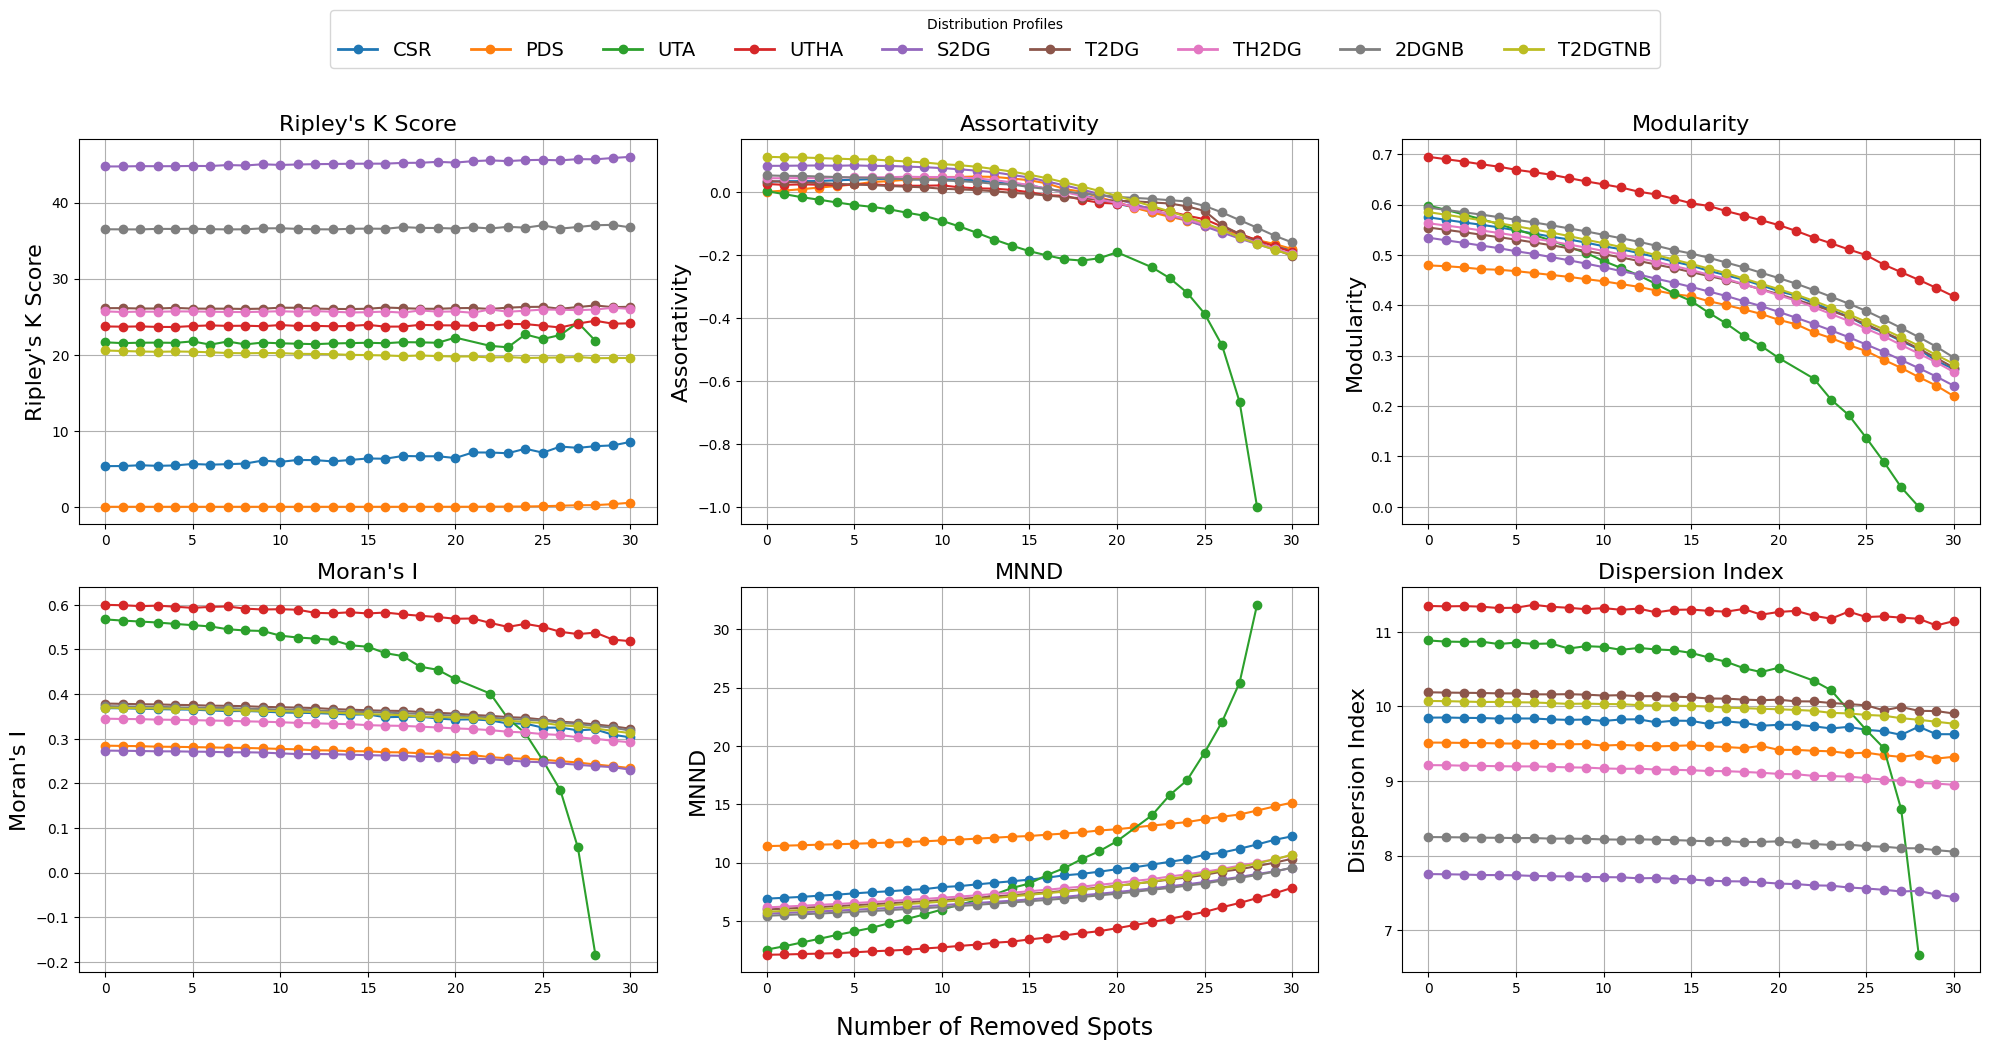

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming final_df is your dataframe

# Define the columns to plot (without 'spot_density')
columns_to_plot = [
    'ripley_k_score', 'assortativity', 'modularity', 
    'morans_i', 'MNND', 'dispersion_index'
]

# Dictionary for renaming distribution types
methods_dict = {
    "uniform": "CSR",
    "dispersed": "PDS",
    "uniform_2adj_spot": "UTA",
    "uniform_3adj_spot": "UTHA",
    "single_gaussian": "S2DG",
    "gmm_2modes": "T2DG",
    "gmm_3modes": "TH2DG",
    "gaussian_with_nucleoli": "2DGNB",
    "gmm_2modes_with_nucleoli": "T2DGTNB"
}

# Map distribution types to new names and reorder according to the dictionary
final_df['distribution_type'] = final_df.apply(lambda x: methods_dict[x.distribution_type],axis=1)
distribution_order = list(methods_dict.values())

# Define a consistent color palette for all plots
palette = sns.color_palette("tab10", n_colors=len(distribution_order))
color_mapping = dict(zip(distribution_order, palette))

# Create a list of unique distribution profiles in the desired order
distribution_profiles = [profile for profile in distribution_order if profile in final_df['distribution_type'].unique()]
summary_results = []

# Helper function to format labels
def format_label(text):
    if (text=='MNND') or (text=='Normalized MSE') or (text=='KS Statistic'):
        return text
    if  (text=="ripley_k_score"):
        return "Ripley's K Score"
    if  (text=="morans_i"):
        return "Moran's I"
    return ' '.join([word.capitalize() for word in text.replace('_', ' ').split()])

# Create 2x3 subplot layout
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
axes = axes.flatten()

# Loop through each metric and plot on respective subplot
for i, metric in enumerate(columns_to_plot):
    ax = axes[i]
    
    for profile in distribution_profiles:
        # Filter data for the specific distribution profile
        profile_data = final_df[final_df['distribution_type'] == profile].dropna()
        
        # Calculate mean values
        mean_values = profile_data.groupby('num_removed_spots')[metric].mean()
        mean_diff = mean_values - mean_values[0]

        summary_results.append({
            'Metric': metric,
            'Distribution': profile,
            'Percent Change (%)': 100 * (np.max(abs(mean_diff))) / mean_values[0]
        })
        # Plot mean values with consistent colors
        ax.plot(mean_values.index, mean_values, label=profile, marker='o', color=color_mapping[profile])
    
    # Set labels and title for each subplot
    ax.set_ylabel(format_label(metric), fontsize=16)
    ax.set_title(f'{format_label(metric)}', fontsize=16)
    ax.grid(True)

# Remove unused subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Save the summary results as a CSV
summary_df = pd.DataFrame(summary_results)
output_file = "/data/krishnendu/ripley_paper/generated_spots_analysis/metric_percent_change_summary.csv"
summary_df.to_csv(output_file, index=False)

# Add one legend for the entire figure, placed at the top
fig.legend(
    handles=[
        plt.Line2D([0], [0], color=color_mapping[profile], lw=2, marker='o') 
        for profile in distribution_profiles
    ],
    labels=distribution_profiles,
    loc='upper center',
    bbox_to_anchor=(0.5, 1.05),
    ncol=len(distribution_profiles),  # Arrange in one line
    title='Distribution Profiles',
    fontsize=14
)
fig.supxlabel('Number of Removed Spots', fontsize=17)

# Adjust layout to make space for the legend at the top
plt.tight_layout(rect=[0, 0, 1, 0.95])

plt.show()


In [48]:
summary_df

,Metric,Distribution,Percent Change (%)
0,ripley_k_score,uniform_3adj_spot,3.711131
1,ripley_k_score,gaussian_with_nucleoli,1.638856
2,ripley_k_score,dispersed,1032.054455
3,ripley_k_score,uniform,49.054265
4,ripley_k_score,uniform_2adj_spot,14.955173
5,ripley_k_score,gmm_2modes_with_nucleoli,5.084491
6,ripley_k_score,single_gaussian,2.804065
7,ripley_k_score,gmm_2modes,1.797864
8,ripley_k_score,gmm_3modes,2.553186
9,assortativity,uniform_3adj_spot,-729.351245


In [ ]:
import pickle
with open('/data/krishnendu/ripley_paper/generated_spots/uniform_ellipse_locations_dict.pkl', 'rb') as f:
    locations_dict = pickle.load(f)
#

# Compare scrambled to uniform

In [ ]:
synth_spots = pd.read_pickle('HCT116_synth_spots_complete_results_all_plates.pickle')

In [62]:
real_spots = pd.read_pickle('/data/krishnendu/ripley_paper/HCT116_rep1_subset_results.pkl')

KeyboardInterrupt: 

In [33]:
ncaph2_scr_real_spots.sigma_cdf.std()/ncaph2_scr_real_spots.sigma_cdf.mean()

0.1760048259240803

In [38]:
sub_real_spots = real_spots.loc[real_spots.spots_number>10]

ncaph2_scr_real_spots = sub_real_spots.loc[(sub_real_spots.gene_symbol=="scrambled") | (sub_real_spots.gene_symbol=="NCAPH2")]

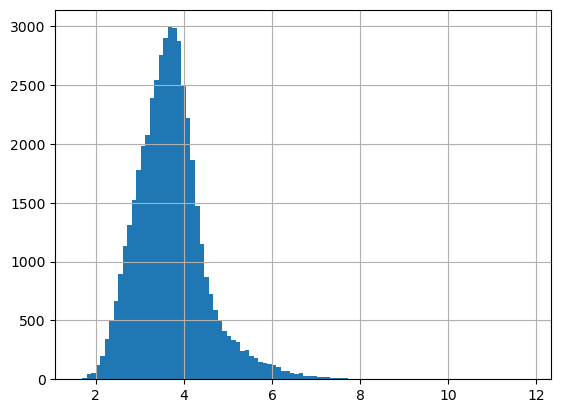

In [39]:
ncaph2_scr_real_spots.sigma_cdf.hist(bins=100)
plt.show()

In [ ]:
ncaph2_scr_real_spots.nuc_centered_spots.iloc[0]

In [34]:
all_distances = []
all_coords = []
for ind, row in ncaph2_scr_real_spots.iterrows():
    
    all_distances.append(row['flattened_distances'])
    all_coords.append(row.nuc_centered_spots)

In [35]:
all_dist = np.concatenate(all_distances,axis=0)
# all_coords = np.concatenate(all_coords,axis=0)

In [71]:
import numpy as np
import pandas as pd
from skbio.stats.distance import permanova
from sklearn.metrics import pairwise_distances

# Assuming each element in the column is an n by 2 numpy array
all_spots = np.vstack(ncaph2_scr_real_spots['nuc_centered_spots_std'].values)
cell_labels = np.concatenate([[i] * len(ncaph2_scr_real_spots['nuc_centered_spots_std'].iloc[i]) 
                              for i in range(len(ncaph2_scr_real_spots))])

# Convert to DataFrame for easier manipulation
all_spots_df = pd.DataFrame(all_spots, columns=['x', 'y'])
all_spots_df['cell'] = cell_labels


In [61]:
from sklearn.metrics.pairwise import euclidean_distances

def incremental_permanova(data, labels, chunk_size=1000, permutations=999):
    n = len(data)
    total_ssq = 0
    ssq_within = 0
    unique_labels = np.unique(labels)

    for i in range(0, n, chunk_size):
        chunk = data[i:i + chunk_size]
        distances = euclidean_distances(chunk)

        # Calculate sums of squares for the chunk
        total_ssq += np.sum(distances ** 2) / (2 * len(chunk))

        for label in unique_labels:
            group_mask = labels[i:i + chunk_size] == label
            group_distances = distances[group_mask][:, group_mask]
            ssq_within += np.sum(group_distances ** 2) / (2 * np.sum(group_mask))

    ssq_between = total_ssq - ssq_within
    df_between = len(unique_labels) - 1
    df_within = n - len(unique_labels)
    ms_between = ssq_between / df_between
    ms_within = ssq_within / df_within
    f_statistic = ms_between / ms_within

    # Perform permutations (if desired)
    permuted_f_stats = []
    for _ in range(permutations):
        np.random.shuffle(labels)
        permuted_f_stats.append(incremental_permanova(data, labels, chunk_size, permutations=0)[0])

    p_value = np.sum(permuted_f_stats >= f_statistic) / permutations
    return f_statistic, p_value

# Example usage
f_statistic, p_value = incremental_permanova(all_spots_df[['x', 'y']], all_spots_df['cell'], chunk_size=1000)
print(f"Incremental PERMANOVA F-statistic: {f_statistic:.4f}, p-value: {p_value:.4f}")


<ipython-input-61-df0adb83c95c>:19: RuntimeWarning: invalid value encountered in scalar divide
  ssq_within += np.sum(group_distances ** 2) / (2 * np.sum(group_mask))
<ipython-input-61-df0adb83c95c>:19: RuntimeWarning: invalid value encountered in scalar divide
  ssq_within += np.sum(group_distances ** 2) / (2 * np.sum(group_mask))
<ipython-input-61-df0adb83c95c>:19: RuntimeWarning: invalid value encountered in scalar divide
  ssq_within += np.sum(group_distances ** 2) / (2 * np.sum(group_mask))
<ipython-input-61-df0adb83c95c>:19: RuntimeWarning: invalid value encountered in scalar divide
  ssq_within += np.sum(group_distances ** 2) / (2 * np.sum(group_mask))
<ipython-input-61-df0adb83c95c>:19: RuntimeWarning: invalid value encountered in scalar divide
  ssq_within += np.sum(group_distances ** 2) / (2 * np.sum(group_mask))
<ipython-input-61-df0adb83c95c>:19: RuntimeWarning: invalid value encountered in scalar divide
  ssq_within += np.sum(group_distances ** 2) / (2 * np.sum(group_mask)

KeyboardInterrupt: 

In [61]:
# Assuming your dataframe is called 'df'

scr_real_spots = ncaph2_scr_real_spots.loc[ncaph2_scr_real_spots['gene_symbol']=="scrambled"]
data = np.vstack(scr_real_spots['nuc_centered_spots_std'].values)
# Split the data into x and y coordinates
x = data[:, 0]
y = data[:, 1]


plt.figure(figsize=(8, 6))
plt.hist2d(x, y, bins=100, cmap='Blues', density=True)  # Adjust 'bins' to control the resolution

# Add a colorbar to show the intensity scale
plt.colorbar(label='Probability')

# Set labels and title
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.title('2D Histogram of X and Y Positions for siNCAPH2')

# Show the plot
plt.show()

NameError: name 'ncaph2_scr_real_spots' is not defined

In [138]:
import numpy as np
import matplotlib.pyplot as plt

# Assume 'x_data' and 'y_data' are your original data arrays

# Step 1: Create a 2D histogram
hist, x_edges, y_edges = np.histogram2d(x, y, bins=50, density=True)

# Step 2: Calculate the bin centers
x_bin_centers = (x_edges[:-1] + x_edges[1:]) / 2
y_bin_centers = (y_edges[:-1] + y_edges[1:]) / 2

# Step 3: Extract slices where y=0 and x=0
x_slice_index = np.argmin(np.abs(y_bin_centers))  # Closest bin to y=0
y_slice_index = np.argmin(np.abs(x_bin_centers))  # Closest bin to x=0

x_slice = hist[:, x_slice_index]  # Values along the y=0 line
y_slice = hist[y_slice_index, :]  # Values along the x=0 line

# Step 4: Normalize the slices
x_slice_normalized = x_slice / np.trapz(x_slice, x_bin_centers)
y_slice_normalized = y_slice / np.trapz(y_slice, y_bin_centers)

# Now you have x_bin_centers, y_bin_centers, x_slice_normalized, and y_slice_normalized


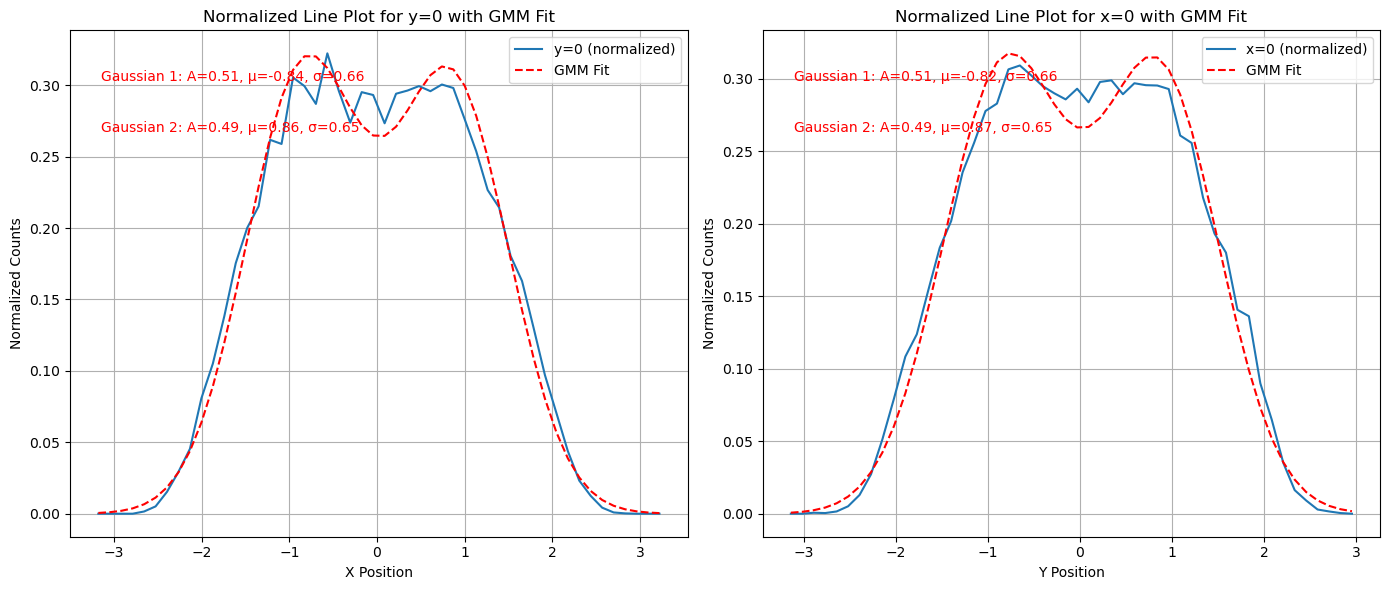

In [153]:
from sklearn.mixture import GaussianMixture


# Assume 'x_data' and 'y_data' are your original data arrays

# Step 1: Create a 2D histogram
hist, x_edges, y_edges = np.histogram2d(x, y, bins=50, density=True)

# Step 2: Calculate the bin centers
x_bin_centers = (x_edges[:-1] + x_edges[1:]) / 2
y_bin_centers = (y_edges[:-1] + y_edges[1:]) / 2

# Step 3: Extract slices where y=0 and x=0
x_slice_index = np.argmin(np.abs(y_bin_centers))  # Closest bin to y=0
y_slice_index = np.argmin(np.abs(x_bin_centers))  # Closest bin to x=0

x_slice = hist[:, x_slice_index]  # Values along the y=0 line
y_slice = hist[y_slice_index, :]  # Values along the x=0 line

# Step 4: Normalize the slices
x_slice_normalized = x_slice / np.trapz(x_slice, x_bin_centers)
y_slice_normalized = y_slice / np.trapz(y_slice, y_bin_centers)

# Now you have x_bin_centers, y_bin_centers, x_slice_normalized, and y_slice_normalized

# Reshape the data for GMM by repeating the data points according to their normalized counts
x_data_expanded = np.repeat(x_bin_centers, np.round(x_slice_normalized * 1000).astype(int)).reshape(-1, 1)
y_data_expanded = np.repeat(y_bin_centers, np.round(y_slice_normalized * 1000).astype(int)).reshape(-1, 1)

# Fit GMM for x=0 slice
gmm_x = GaussianMixture(n_components=2).fit(x_data_expanded)
x_gmm_fit = np.exp(gmm_x.score_samples(x_bin_centers.reshape(-1, 1)))

# Fit GMM for y=0 slice
gmm_y = GaussianMixture(n_components=2).fit(y_data_expanded)
y_gmm_fit = np.exp(gmm_y.score_samples(y_bin_centers.reshape(-1, 1)))

# Normalize GMM fits so that area under the curve is 1
x_gmm_fit_normalized = x_gmm_fit / np.trapz(x_gmm_fit, x_bin_centers)
y_gmm_fit_normalized = y_gmm_fit / np.trapz(y_gmm_fit, y_bin_centers)

# Extract means, standard deviations, and amplitudes of the fitted Gaussian components
x_means = gmm_x.means_.flatten()
x_stds = np.sqrt(gmm_x.covariances_).flatten()
x_amplitudes = gmm_x.weights_

y_means = gmm_y.means_.flatten()
y_stds = np.sqrt(gmm_y.covariances_).flatten()
y_amplitudes = gmm_y.weights_

# Plotting the line plots with GMM fits
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(x_bin_centers, x_slice_normalized, label='y=0 (normalized)')
plt.plot(x_bin_centers, x_gmm_fit_normalized, 'r--', label='GMM Fit')
plt.xlabel('X Position')
plt.ylabel('Normalized Counts')
plt.title('Normalized Line Plot for y=0 with GMM Fit')
plt.grid(True)
plt.legend()

# Add text annotation for amplitude, mean, and std
for i, (amplitude, mean, std) in enumerate(zip(x_amplitudes, x_means, x_stds)):
    plt.text(0.05, 0.9 - 0.1 * i, f'Gaussian {i+1}: A={amplitude:.2f}, μ={mean:.2f}, σ={std:.2f}', 
             transform=plt.gca().transAxes, fontsize=10, color='red')

plt.subplot(1, 2, 2)
plt.plot(y_bin_centers, y_slice_normalized, label='x=0 (normalized)')
plt.plot(y_bin_centers, y_gmm_fit_normalized, 'r--', label='GMM Fit')
plt.xlabel('Y Position')
plt.ylabel('Normalized Counts')
plt.title('Normalized Line Plot for x=0 with GMM Fit')
plt.grid(True)
plt.legend()

# Add text annotation for amplitude, mean, and std
for i, (amplitude, mean, std) in enumerate(zip(y_amplitudes, y_means, y_stds)):
    plt.text(0.05, 0.9 - 0.1 * i, f'Gaussian {i+1}: A={amplitude:.2f}, μ={mean:.2f}, σ={std:.2f}', 
             transform=plt.gca().transAxes, fontsize=10, color='red')

plt.tight_layout()
plt.show()


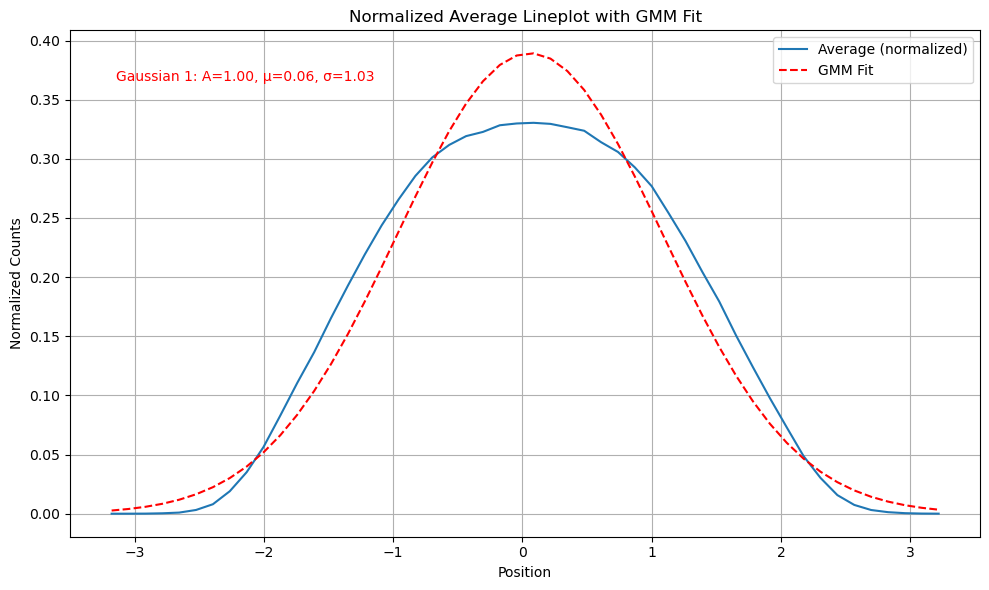

In [157]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

# Assume 'x' and 'y' are your original data arrays
# Step 1: Create a 2D histogram
hist, x_edges, y_edges = np.histogram2d(x, y, bins=50, density=True)

# Step 2: Calculate the bin centers
x_bin_centers = (x_edges[:-1] + x_edges[1:]) / 2
y_bin_centers = (y_edges[:-1] + y_edges[1:]) / 2

# Step 3: Calculate the average lineplot
avg_lineplot = (np.mean(hist, axis=0) + np.mean(hist, axis=1)) / 2

# Step 4: Normalize the average lineplot
avg_lineplot_normalized = avg_lineplot / np.trapz(avg_lineplot, x_bin_centers)

# Reshape the data for GMM by repeating the data points according to their normalized counts
data_expanded = np.repeat(x_bin_centers, np.round(avg_lineplot_normalized * 1000).astype(int)).reshape(-1, 1)

# Fit GMM to the average lineplot
gmm = GaussianMixture(n_components=1).fit(data_expanded)
gmm_fit = np.exp(gmm.score_samples(x_bin_centers.reshape(-1, 1)))

# Normalize GMM fit so that area under the curve is 1 
gmm_fit_normalized = gmm_fit / np.trapz(gmm_fit, x_bin_centers)

# Extract means, standard deviations, and amplitudes of the fitted Gaussian components
means = gmm.means_.flatten()
stds = np.sqrt(gmm.covariances_).flatten()
amplitudes = gmm.weights_

# Plotting the average lineplot with GMM fit
plt.figure(figsize=(10, 6))
plt.plot(x_bin_centers, avg_lineplot_normalized, label='Average (normalized)')
plt.plot(x_bin_centers, gmm_fit_normalized, 'r--', label='GMM Fit')
plt.xlabel('Position')
plt.ylabel('Normalized Counts')
plt.title('Normalized Average Lineplot with GMM Fit')
plt.grid(True)
plt.legend()

# Add text annotation for amplitude, mean, and std
for i, (amplitude, mean, std) in enumerate(zip(amplitudes, means, stds)):
    plt.text(0.05, 0.9 - 0.1 * i, f'Gaussian {i+1}: A={amplitude:.2f}, μ={mean:.2f}, σ={std:.2f}', 
             transform=plt.gca().transAxes, fontsize=10, color='red')

plt.tight_layout()
plt.show()

In [160]:
ncaph2_scr_real_spots

,column,row,field_index,cell_index,area,mean_intensity,perimeter,solidity,plate_ID,spots_path,...,centroid-0,centroid-1,orientation,major_axis_length,minor_axis_length,max_intensity,min_intensity,spots_cell_ceneter_dist,nuc_centered_spots,nuc_centered_spots_std
2243,23,2,1,1,124.625797,7809.745017,44.828441,0.950831,HT001083,/data1/image_patches/spots/HT001083_Spots_patc...,...,82.051429,262.193024,0.683730,14.088352,11.643383,17427,3700,0.785135,"[[-5.8037727212140116, 2.5588500875554594], [-...","[[-1.745648131596694, 1.1302339227842244], [-1..."
2244,23,2,1,2,139.495121,4708.953885,44.996911,0.988377,HT001083,/data1/image_patches/spots/HT001083_Spots_patc...,...,105.401428,510.559765,-0.840963,15.363615,11.656989,9464,1806,1.031696,"[[-2.4766459001971697, 0.7599690983337979], [-...","[[-1.4253218099596037, 0.335440994448054], [-1..."
2245,23,2,1,3,95.016039,5836.550746,39.676115,0.982195,HT001083,/data1/image_patches/spots/HT001083_Spots_patc...,...,107.289062,1409.532741,1.210488,15.452685,7.891586,10801,1617,0.349264,"[[-3.00464333616884, -0.49706970623731195], [-...","[[-1.9970655968781317, -0.3037834166827163], [..."
2246,23,2,1,4,94.008346,3477.867880,37.294687,0.972131,HT001083,/data1/image_patches/spots/HT001083_Spots_patc...,...,125.030039,1791.540945,0.680915,12.058529,10.088507,6939,1037,1.091807,"[[-3.913387143743112, -1.1690618509936428], [-...","[[-1.7173107708793809, -0.05490965362684884], ..."
2247,23,2,1,5,97.441531,4123.010462,39.186092,0.956852,HT001083,/data1/image_patches/spots/HT001083_Spots_patc...,...,124.329606,1541.965849,-1.065009,13.034826,9.874532,8704,936,0.486745,"[[-2.5480706672637705, 1.9995371249440552], [-...","[[-1.5567054488785466, 0.7568119851696665], [-..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
947599,23,14,9,102,132.570164,3828.115697,45.832113,0.943856,HT001085,/data1/image_patches/spots/HT001085_Spots_patc...,...,1894.082729,1013.268870,-0.249611,15.465972,11.283950,9863,860,0.368645,"[[-4.0530164529687625, -1.646004402701621], [-...","[[-1.601541437055341, -0.8545987239863724], [-..."
947600,23,14,9,103,115.744041,4289.094149,40.695173,0.986813,HT001085,/data1/image_patches/spots/HT001085_Spots_patc...,...,1883.214922,1123.692347,0.773413,13.513536,10.963868,9159,903,0.591376,"[[-5.012748269475111, -1.4920511331912678], [-...","[[-1.9554580158383617, -0.3824726302874664], [..."
947601,23,14,9,104,130.004063,4245.096350,44.950754,0.964867,HT001085,/data1/image_patches/spots/HT001085_Spots_patc...,...,1894.953673,1639.294187,0.574219,14.641396,11.605008,11238,711,0.856294,"[[-5.988255028822209, 0.5634132007762958], [-4...","[[-1.8680428094506751, 0.4748781004771086], [-..."
947602,23,14,9,106,115.181608,4035.988911,42.669879,0.944103,HT001085,/data1/image_patches/spots/HT001085_Spots_patc...,...,1908.956358,312.154425,-0.373655,12.740012,12.066419,8626,841,0.557980,"[[-3.0111755598383922, 2.093431074582469], [-2...","[[-1.5122261277595836, 1.7929771335239917], [-..."


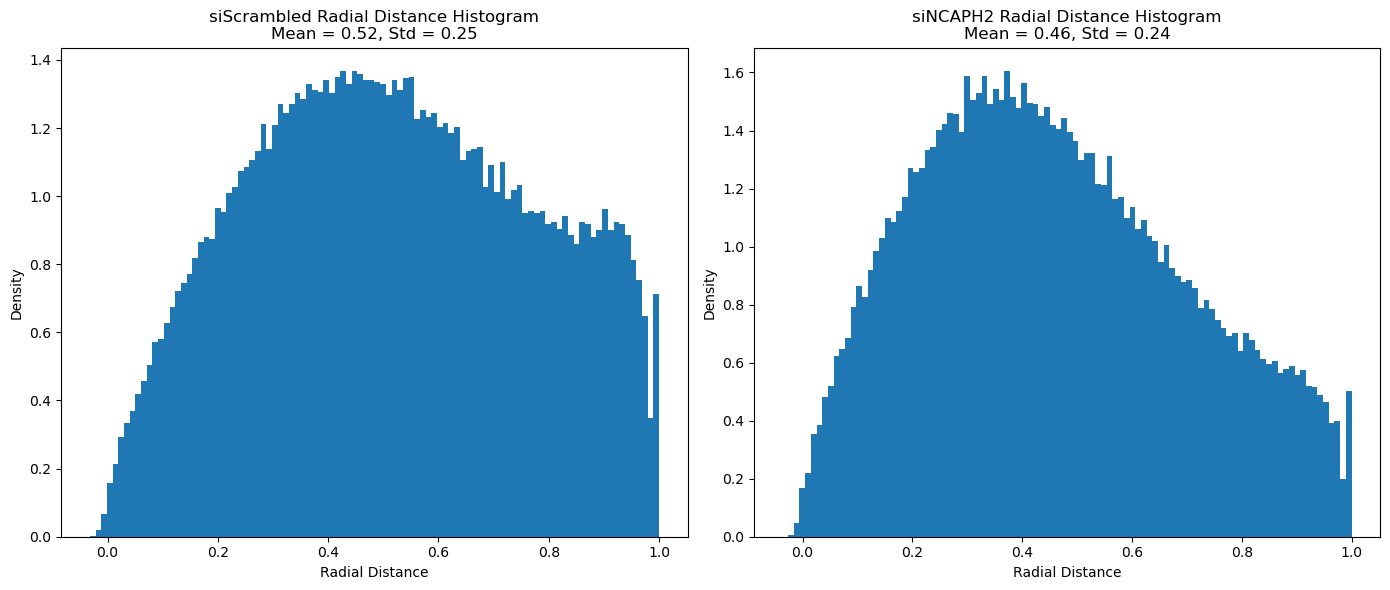

In [124]:
import matplotlib.pyplot as plt
import numpy as np

scr_radial_list = []
sub_ncaph2_scr_real_spots = ncaph2_scr_real_spots.loc[ncaph2_scr_real_spots.gene_symbol == "scrambled"]
for ind, row in sub_ncaph2_scr_real_spots.iterrows():
    scr_radial_list.append(row.spot_radial_distances[0][0])
scr_radial_dist = np.concatenate(scr_radial_list)

# Calculate mean and standard deviation for scrambled data
scr_mean = np.mean(scr_radial_dist)
scr_std = np.std(scr_radial_dist)

plt.figure(figsize=(14, 6))

# Plot for siScrambled
plt.subplot(1, 2, 1)
plt.hist(scr_radial_dist, bins=100, density=True)
plt.xlabel('Radial Distance')
plt.ylabel('Density')
plt.title(f'siScrambled Radial Distance Histogram\nMean = {scr_mean:.2f}, Std = {scr_std:.2f}')

ncaph2_radial_list = []
sub_ncaph2_scr_real_spots = ncaph2_scr_real_spots.loc[ncaph2_scr_real_spots.gene_symbol == "NCAPH2"]
for ind, row in sub_ncaph2_scr_real_spots.iterrows():
    ncaph2_radial_list.append(row.spot_radial_distances[0][0])
ncaph2_radial_dist = np.concatenate(ncaph2_radial_list)

# Calculate mean and standard deviation for NCAPH2 data
ncaph2_mean = np.mean(ncaph2_radial_dist)
ncaph2_std = np.std(ncaph2_radial_dist)

# Plot for siNCAPH2
plt.subplot(1, 2, 2)
plt.hist(ncaph2_radial_dist, bins=100, density=True)
plt.xlabel('Radial Distance')
plt.ylabel('Density')
plt.title(f'siNCAPH2 Radial Distance Histogram\nMean = {ncaph2_mean:.2f}, Std = {ncaph2_std:.2f}')

plt.tight_layout()
plt.show()


In [161]:
ncaph2_scr_real_spots.columns

Index(['column', 'row', 'field_index', 'cell_index', 'area', 'mean_intensity',
       'perimeter', 'solidity', 'plate_ID', 'spots_path', 'masks_path',
       'nuceli_path', 'biological_replicate', 'distance_matrix',
       'spot_coordinates', 'spot_radial_distances', 'spot_intensity_info',
       'ripley_no_correction', 'clustering_percentage',
       'ripley_ripley_correction', 'H_ripley_correction', 'ripley_max_radius',
       'clustering_percentage_r_correction',
       'ripley_max_derivative_r_correction', 'mean_radial_distance',
       'spots_number', 'imaging_well', 'gene_symbol', 'flattened_distances',
       'sigma_cdf', 'lmabda_cdf', 'mse_cdf', 'sigma', 'lmabda', 'mse',
       'centroid-0', 'centroid-1', 'orientation', 'major_axis_length',
       'minor_axis_length', 'max_intensity', 'min_intensity',
       'spots_cell_ceneter_dist', 'nuc_centered_spots',
       'nuc_centered_spots_std'],
      dtype='object')

In [162]:
import numpy as np
import pandas as pd
from concurrent.futures import ThreadPoolExecutor, as_completed

# Initial parameters for MCMC
initial_r0 = 5.0
initial_sigma = 3.0
n_iterations = 1000
T_burnin = 100

# Proposal distribution standard deviations for r0 and sigma
eta_r0 = 0.1
eta_sigma = 0.1

# Dictionary to store results for each cell line
cell_line_results = {}

# Function to compute radial distances for a cell's centromere data
def compute_radial_distances(xy_coords):
    return np.sqrt(np.sum(xy_coords**2, axis=1))

# Likelihood function
def log_likelihood(r0, sigma, radial_distances):
    likelihood = -0.5 * np.sum((radial_distances - r0)**2 / sigma**2) - len(radial_distances) * np.log(sigma)
    return likelihood

# MCMC function for a single cell line
def run_mcmc_for_cell_line(treatment_data, initial_r0, initial_sigma, eta_r0, eta_sigma, n_iterations, T_burnin):
    # Initialize current values of r0 and sigma
    r0_current = initial_r0
    sigma_current = initial_sigma
    
    r0_samples = []
    sigma_samples = []

    # MCMC loop
    for t in range(n_iterations):
        # Propose new values for r0 and sigma
        r0_new = r0_current + np.random.normal(0, eta_r0)
        sigma_new = sigma_current + np.random.normal(0, eta_sigma)
        
        # Check for positive sigma
        if sigma_new <= 0:
            sigma_new = sigma_current
        
        log_posterior_current = 0
        log_posterior_new = 0

        # Loop through each cell's data in the current cell type
        for xy_coords in treatment_data:
            radial_distances = compute_radial_distances(np.array(xy_coords))
            
            # Compute log-likelihood for current and new r0 and sigma
            log_likelihood_current = log_likelihood(r0_current, sigma_current, radial_distances)
            log_likelihood_new = log_likelihood(r0_new, sigma_new, radial_distances)
            
            log_posterior_current += log_likelihood_current
            log_posterior_new += log_likelihood_new

        # Add prior contributions (Gaussian priors for r0 and sigma)
        log_posterior_current += -0.5 * (r0_current - 5)**2 / 2 + -0.5 * (sigma_current - 3)**2 / 2
        log_posterior_new += -0.5 * (r0_new - 5)**2 / 2 + -0.5 * (sigma_new - 3)**2 / 2

        # Calculate acceptance ratio
        alpha = np.exp(log_posterior_new - log_posterior_current)

        # Accept or reject the new values
        if np.random.uniform(0, 1) < alpha:
            r0_current = r0_new
            sigma_current = sigma_new

        # Store the samples after burn-in
        if t >= T_burnin:
            r0_samples.append(r0_current)
            sigma_samples.append(sigma_current)

    # Convert samples to arrays
    r0_samples = np.array(r0_samples)
    sigma_samples = np.array(sigma_samples)

    # Summary statistics
    r0_mean = np.mean(r0_samples)
    sigma_mean = np.mean(sigma_samples)

    return r0_mean, sigma_mean

# Function to run MCMC for each cell line in parallel
def run_mcmc_for_all_cell_lines(scr_real_spots):
    treatmet_groups = ncaph2_scr_real_spots.groupby('gene_symbol')['nuc_centered_spots']
    results = {}

    with ThreadPoolExecutor() as executor:
        future_to_gene_symbol = {executor.submit(run_mcmc_for_cell_line, treatment_data, initial_r0, initial_sigma, eta_r0, eta_sigma, n_iterations, T_burnin): gene_symbol
                               for gene_symbol, treatment_data in treatmet_groups}

        for future in as_completed(future_to_gene_symbol):
            gene_symbol = future_to_gene_symbol[future]
            try:
                r0_mean, sigma_mean = future.result()
                results[gene_symbol] = {'r0': r0_mean, 'sigma': sigma_mean}
            except Exception as exc:
                print(f'{gene_symbol} generated an exception: {exc}')
    
    return results

# Run MCMC for all cell lines and store the results
cell_line_results = run_mcmc_for_all_cell_lines(scr_real_spots)
# Print the results
print(cell_line_results)


<ipython-input-162-4a9963371b4f>:65: RuntimeWarning: overflow encountered in exp
  alpha = np.exp(log_posterior_new - log_posterior_current)


{'NCAPH2': {'r0': 3.335640067808577, 'sigma': 1.7141042723626596}, 'scrambled': {'r0': 3.6923599429926313, 'sigma': 1.768765131528857}}


In [163]:
import pickle
# Save the results in a pickle file
with open('/data/krishnendu/ripley_paper/bayesian_scr_ncaph2_results.pkl', 'wb') as f:
    pickle.dump(cell_line_results, f)

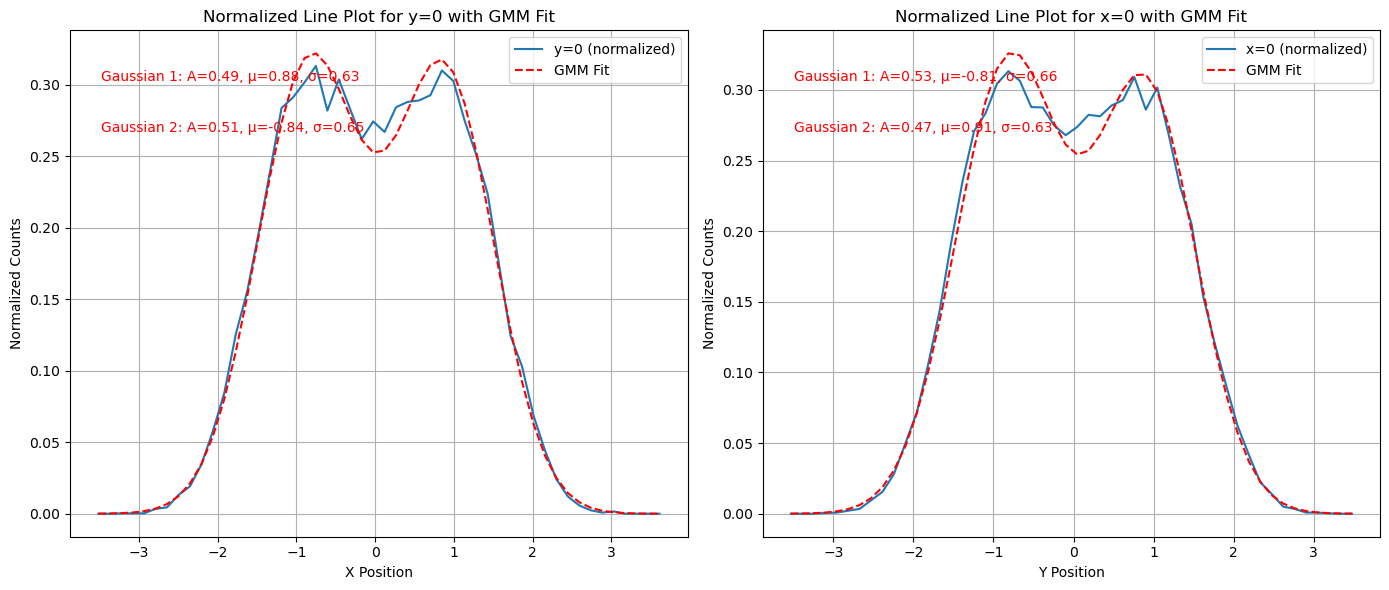

In [130]:
from sklearn.mixture import GaussianMixture
import numpy as np
import matplotlib.pyplot as plt

# Reshape the data for GMM by repeating the data points according to their normalized counts
x_data_expanded = np.repeat(x_bin_centers, np.round(x_slice_normalized * 1000).astype(int)).reshape(-1, 1)
y_data_expanded = np.repeat(y_bin_centers, np.round(y_slice_normalized * 1000).astype(int)).reshape(-1, 1)

# Fit GMM for x=0 slice
gmm_x = GaussianMixture(n_components=2).fit(x_data_expanded)
x_gmm_fit = np.exp(gmm_x.score_samples(x_bin_centers.reshape(-1, 1)))

# Fit GMM for y=0 slice
gmm_y = GaussianMixture(n_components=2).fit(y_data_expanded)
y_gmm_fit = np.exp(gmm_y.score_samples(y_bin_centers.reshape(-1, 1)))

# Normalize GMM fits so that area under the curve is 1
x_gmm_fit_normalized = x_gmm_fit / np.trapz(x_gmm_fit, x_bin_centers)
y_gmm_fit_normalized = y_gmm_fit / np.trapz(y_gmm_fit, y_bin_centers)

# Extract means, standard deviations, and amplitudes of the fitted Gaussian components
x_means = gmm_x.means_.flatten()
x_stds = np.sqrt(gmm_x.covariances_).flatten()
x_amplitudes = gmm_x.weights_

y_means = gmm_y.means_.flatten()
y_stds = np.sqrt(gmm_y.covariances_).flatten()
y_amplitudes = gmm_y.weights_

# Plotting the line plots with GMM fits
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(x_bin_centers, x_slice_normalized, label='y=0 (normalized)')
plt.plot(x_bin_centers, x_gmm_fit_normalized, 'r--', label='GMM Fit')
plt.xlabel('X Position')
plt.ylabel('Normalized Counts')
plt.title('Normalized Line Plot for y=0 with GMM Fit')
plt.grid(True)
plt.legend()

# Add text annotation for amplitude, mean, and std
for i, (amplitude, mean, std) in enumerate(zip(x_amplitudes, x_means, x_stds)):
    plt.text(0.05, 0.9 - 0.1 * i, f'Gaussian {i+1}: A={amplitude:.2f}, μ={mean:.2f}, σ={std:.2f}', 
             transform=plt.gca().transAxes, fontsize=10, color='red')

plt.subplot(1, 2, 2)
plt.plot(y_bin_centers, y_slice_normalized, label='x=0 (normalized)')
plt.plot(y_bin_centers, y_gmm_fit_normalized, 'r--', label='GMM Fit')
plt.xlabel('Y Position')
plt.ylabel('Normalized Counts')
plt.title('Normalized Line Plot for x=0 with GMM Fit')
plt.grid(True)
plt.legend()

# Add text annotation for amplitude, mean, and std
for i, (amplitude, mean, std) in enumerate(zip(y_amplitudes, y_means, y_stds)):
    plt.text(0.05, 0.9 - 0.1 * i, f'Gaussian {i+1}: A={amplitude:.2f}, μ={mean:.2f}, σ={std:.2f}', 
             transform=plt.gca().transAxes, fontsize=10, color='red')

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import rayleigh, kstest

def fit_and_plot_rayleigh_with_ks(all_dist):
    # Fit Rayleigh distribution to the data
    params = rayleigh.fit(all_dist)
    sigma_fitted = params[1]  # scale parameter is sigma

    # Generate the fitted Rayleigh distribution
    x = np.linspace(0, np.max(all_dist), 1000)
    fitted_pdf = rayleigh.pdf(x, loc=params[0], scale=sigma_fitted)

    # Calculate the K-S statistic
    ks_stat, p_value = kstest(all_dist, 'rayleigh', args=params)

    # Plot the histogram of the data
    plt.figure(figsize=(6, 6))
    plt.hist(all_dist, bins=100, density=True, alpha=0.6, color='g', label='Histogram of Data')

    # Plot the fitted Rayleigh distribution
    plt.plot(x, fitted_pdf, 'r-', lw=2, label=f'Fitted Rayleigh Distribution (σ={sigma_fitted:.2f})')

    # Add labels and legend
    plt.xlabel('Distance')
    plt.ylabel('Probability Density')
    plt.title(f'Histogram of Data and Fitted Rayleigh Distribution\nK-S Statistic = {ks_stat:.4f}, p-value = {p_value:.4f}')
    plt.legend()

    # Show the plot
    plt.grid(True)
    plt.show()

# Example usage:
# Assuming you have already loaded your array `all_dist`
fit_and_plot_rayleigh_with_ks(all_dist)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson, kstest

def fit_and_plot_poisson_with_ks(all_dist):
    # Estimate the parameter (lambda) for the Poisson distribution
    lambda_fitted = np.mean(all_dist)  # lambda is the mean for Poisson

    # Generate the Poisson distribution PMF
    x = np.arange(0, np.max(all_dist) + 1)  # Poisson is defined for non-negative integers
    fitted_pmf = poisson.pmf(x, mu=lambda_fitted)

    # Calculate the K-S statistic for the Poisson distribution
    # Since Poisson is a discrete distribution, use 'poisson' with the fitted lambda
    ks_stat, p_value = kstest(all_dist, 'poisson', args=(lambda_fitted,))

    # Plot the histogram of the data
    plt.figure(figsize=(10, 6))
    plt.hist(all_dist, bins=100, density=True, alpha=0.6, color='g', label='Histogram of Data')

    # Plot the fitted Poisson distribution
    plt.plot(x, fitted_pmf, 'r-', lw=2, label=f'Fitted Poisson Distribution (λ={lambda_fitted:.2f})')

    # Add labels and legend
    plt.xlabel('Value')
    plt.ylabel('Probability Density')
    plt.title(f'Histogram of Data and Fitted Poisson Distribution\nK-S Statistic = {ks_stat:.4f}, p-value = {p_value:.4f}')
    plt.legend()

    # Show the plot
    plt.grid(True)
    plt.show()

# Example usage:
# Assuming you have already loaded your array `all_dist`
fit_and_plot_poisson_with_ks(all_dist)


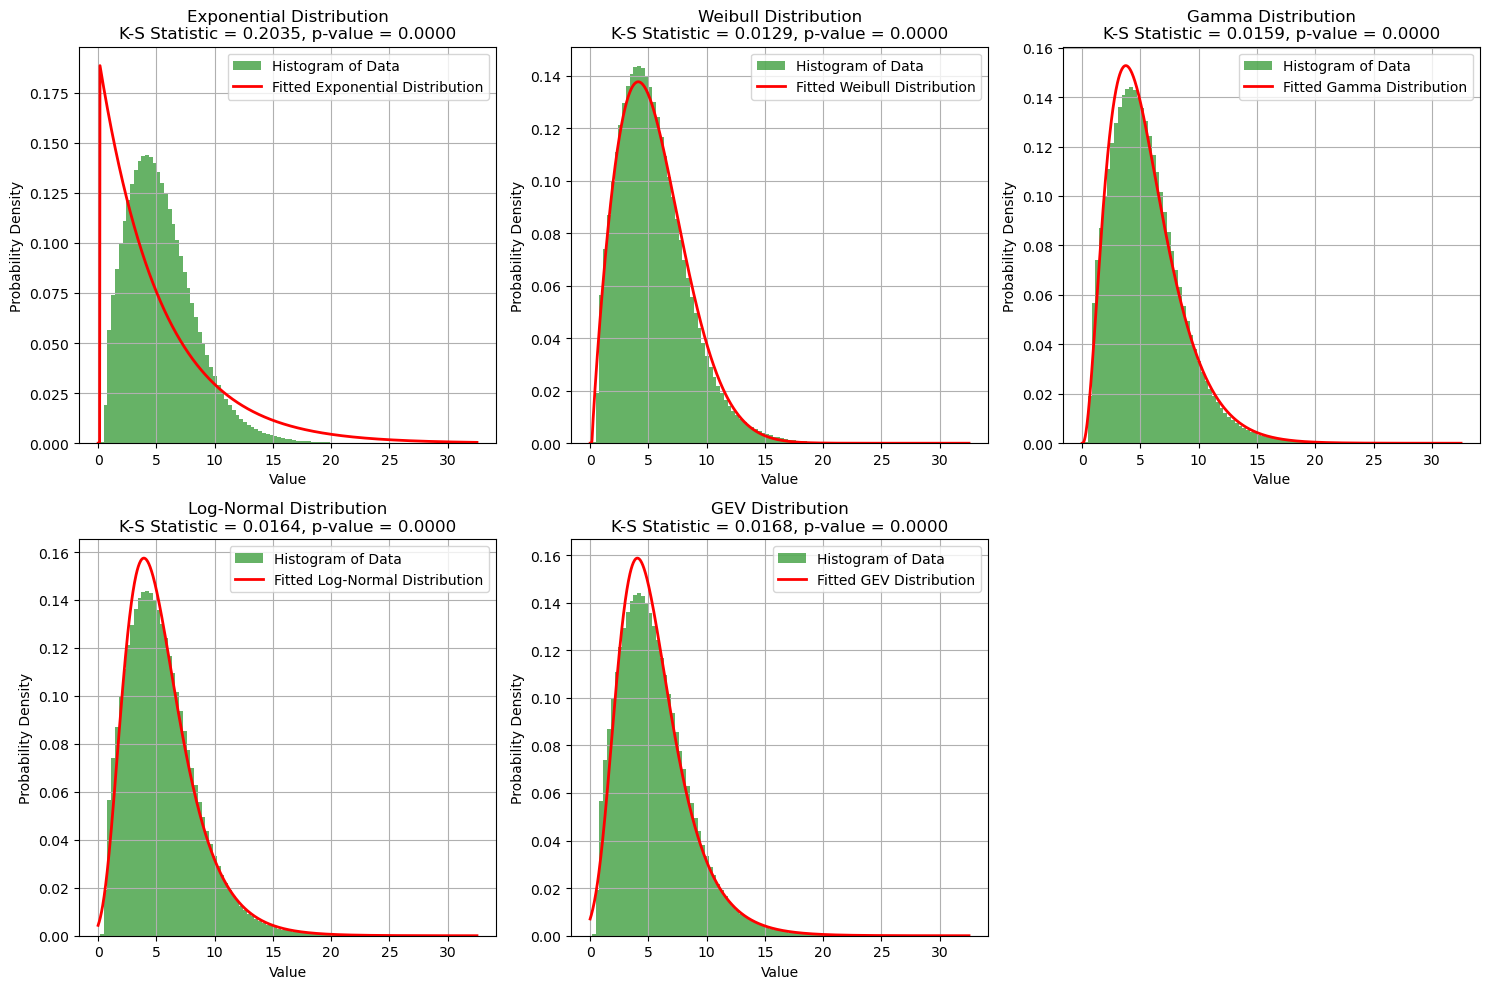

In [164]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon, weibull_min, gamma, lognorm, genextreme, kstest

def fit_and_plot_distributions(all_dist):
    distributions = {
        "Exponential": expon,
        "Weibull": weibull_min,
        "Gamma": gamma,
        "Log-Normal": lognorm,
        "GEV": genextreme
    }
    
    plt.figure(figsize=(15, 10))

    for i, (name, distribution) in enumerate(distributions.items(), 1):
        # Fit the distribution to the data
        params = distribution.fit(all_dist)
        
        # Create an array of x values for plotting the fitted PDF
        x = np.linspace(0, np.max(all_dist), 1000)
        
        # Calculate the PDF using the fitted parameters
        fitted_pdf = distribution.pdf(x, *params)
        
        # Calculate the K-S statistic
        ks_stat, p_value = kstest(all_dist, distribution.name, args=params)
        
        # Plot the histogram of the data and the fitted PDF
        plt.subplot(2, 3, i)
        plt.hist(all_dist, bins=100, density=True, alpha=0.6, color='g', label='Histogram of Data')
        plt.plot(x, fitted_pdf, 'r-', lw=2, label=f'Fitted {name} Distribution')
        plt.xlabel('Value')
        plt.ylabel('Probability Density')
        plt.title(f'{name} Distribution\nK-S Statistic = {ks_stat:.4f}, p-value = {p_value:.4f}')
        plt.legend()
        plt.grid(True)

    plt.tight_layout()
    plt.show()

# Example usage:
# Assuming you have already loaded your array `all_dist`
fit_and_plot_distributions(all_dist)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform
from scipy.stats import kstest

# Step 1: Generate 1000 points from a 2D Gaussian distribution
mean = [0, 0]
cov = [[1, 0], [0, 1]]  # Identity matrix as covariance
points_1000 = np.random.multivariate_normal(mean, cov, 30000)

# Step 2: Generate 50 sets, each with 20 points
sets_50_20 = [np.random.multivariate_normal(mean, cov, 30) for _ in range(1000)]

# Step 3: Calculate pairwise distances for the 1000 points
pairwise_distances_1000 = pdist(points_1000)

# Step 4: Calculate pairwise distances for each of the 50 sets and aggregate them
pairwise_distances_50_sets = np.concatenate([pdist(pts) for pts in sets_50_20])

# Step 5: Plot the histograms of the pairwise distances
plt.figure(figsize=(12, 6))
plt.hist(pairwise_distances_1000, density=True, bins=50, alpha=0.6, color='blue', label='1000 Points')
plt.hist(pairwise_distances_50_sets, density=True, bins=50, alpha=0.6, color='red', label='50 Sets of 20 Points')
plt.xlabel('Pairwise Distance')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.title('Comparison of Pairwise Distances')
plt.grid(True)
plt.show()

# Step 6: Perform K-S test to compare the distributions
ks_stat, p_value = kstest(pairwise_distances_1000, pairwise_distances_50_sets)
print(f"K-S Statistic: {ks_stat:.4f}, p-value: {p_value:.4f}")


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import rayleigh, kstest
from scipy.spatial.distance import pdist

# Step 1: Generate 1000 points from a 2D Gaussian distribution
mean = [0, 0]
cov = [[1, 0], [0, 1]]  # Identity matrix as covariance
points_1000 = np.random.multivariate_normal(mean, cov, 300)

# Step 2: Generate 50 sets, each with 20 points
sets_50_20 = [np.random.multivariate_normal(mean, cov, 30) for _ in range(100)]

# Step 3: Calculate pairwise distances for the 1000 points
pairwise_distances_1000 = pdist(points_1000)

# Step 4: Calculate pairwise distances for each of the 50 sets and aggregate them
pairwise_distances_50_sets = np.concatenate([pdist(pts) for pts in sets_50_20])

# Step 5: Fit Rayleigh distribution to the pairwise distances
params_1000 = rayleigh.fit(pairwise_distances_1000)
params_50_sets = rayleigh.fit(pairwise_distances_50_sets)

# Extract the scale (sigma) parameter
sigma_1000 = params_1000[1]
sigma_50_sets = params_50_sets[1]

# Step 6: Perform K-S test for both cases
ks_stat_1000, p_value_1000 = kstest(pairwise_distances_1000, 'rayleigh', args=params_1000)
ks_stat_50_sets, p_value_50_sets = kstest(pairwise_distances_50_sets, 'rayleigh', args=params_50_sets)

# Step 7: Plot histograms and fitted Rayleigh distributions
plt.figure(figsize=(12, 6))

# 1000 points case
x_1000 = np.linspace(0, np.max(pairwise_distances_1000), 1000)
fitted_pdf_1000 = rayleigh.pdf(x_1000, loc=params_1000[0], scale=sigma_1000)

plt.subplot(1, 2, 1)
plt.hist(pairwise_distances_1000, bins=50, density=True, alpha=0.6, color='blue', label='1000 Points')
plt.plot(x_1000, fitted_pdf_1000, 'r-', lw=2, label=f'Fitted Rayleigh (σ={sigma_1000:.2f})')
plt.xlabel('Pairwise Distance')
plt.ylabel('Probability Density')
plt.title(f'1000 Points\nK-S Statistic = {ks_stat_1000:.4f}, p-value = {p_value_1000:.4f}')
plt.legend()
plt.grid(True)

# 50 sets of 20 points case
x_50_sets = np.linspace(0, np.max(pairwise_distances_50_sets), 1000)
fitted_pdf_50_sets = rayleigh.pdf(x_50_sets, loc=params_50_sets[0], scale=sigma_50_sets)

plt.subplot(1, 2, 2)
plt.hist(pairwise_distances_50_sets, bins=50, density=True, alpha=0.6, color='green', label='50 Sets of 20 Points')
plt.plot(x_50_sets, fitted_pdf_50_sets, 'r-', lw=2, label=f'Fitted Rayleigh (σ={sigma_50_sets:.2f})')
plt.xlabel('Pairwise Distance')
plt.ylabel('Probability Density')
plt.title(f'50 Sets of 20 Points\nK-S Statistic = {ks_stat_50_sets:.4f}, p-value = {p_value_50_sets:.4f}')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Output results for both cases
print(f"1000 Points: Sigma = {sigma_1000:.4f}, K-S Statistic = {ks_stat_1000:.4f}, p-value = {p_value_1000:.4f}")
print(f"50 Sets of 20 Points: Sigma = {sigma_50_sets:.4f}, K-S Statistic = {ks_stat_50_sets:.4f}, p-value = {p_value_50_sets:.4f}")


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import rayleigh, kstest
from scipy.spatial.distance import pdist

def generate_points_within_circle(mean, cov, num_points, radius):
    points = []
    while len(points) < num_points:
        point = np.random.multivariate_normal(mean, cov, 1)[0]
        if np.linalg.norm(point) <= radius:
            points.append(point)
    return np.array(points)

# Step 1: Generate 1000 points from a 2D Gaussian distribution within a circle of radius 2
mean = [0, 0]
cov = [[1, 0], [0, 1]]  # Identity matrix as covariance
points_1000 = generate_points_within_circle(mean, cov, 500, 2)

# Step 2: Generate 50 sets, each with 20 points within a circle of radius 2
sets_50_20 = [generate_points_within_circle(mean, cov, 30, 2) for _ in range(300)]

# Step 3: Calculate pairwise distances for the 1000 points
pairwise_distances_1000 = pdist(points_1000)

# Step 4: Calculate pairwise distances for each of the 50 sets and aggregate them
pairwise_distances_50_sets = np.concatenate([pdist(pts) for pts in sets_50_20])

# Step 5: Fit Rayleigh distribution to the pairwise distances
params_1000 = rayleigh.fit(pairwise_distances_1000)
params_50_sets = rayleigh.fit(pairwise_distances_50_sets)

# Extract the scale (sigma) parameter
sigma_1000 = params_1000[1]
sigma_50_sets = params_50_sets[1]

# Step 6: Perform K-S test for both cases
ks_stat_1000, p_value_1000 = kstest(pairwise_distances_1000, 'rayleigh', args=params_1000)
ks_stat_50_sets, p_value_50_sets = kstest(pairwise_distances_50_sets, 'rayleigh', args=params_50_sets)

# Step 7: Plot histograms and fitted Rayleigh distributions
plt.figure(figsize=(12, 6))

# 1000 points case
x_1000 = np.linspace(0, np.max(pairwise_distances_1000), 1000)
fitted_pdf_1000 = rayleigh.pdf(x_1000, loc=params_1000[0], scale=sigma_1000)

plt.subplot(1, 2, 1)
plt.hist(pairwise_distances_1000, bins=50, density=True, alpha=0.6, color='blue', label='1000 Points')
plt.plot(x_1000, fitted_pdf_1000, 'r-', lw=2, label=f'Fitted Rayleigh (σ={sigma_1000:.2f})')
plt.xlabel('Pairwise Distance')
plt.ylabel('Probability Density')
plt.title(f'1000 Points\nK-S Statistic = {ks_stat_1000:.4f}, p-value = {p_value_1000:.4f}')
plt.legend()
plt.grid(True)

# 50 sets of 20 points case
x_50_sets = np.linspace(0, np.max(pairwise_distances_50_sets), 1000)
fitted_pdf_50_sets = rayleigh.pdf(x_50_sets, loc=params_50_sets[0], scale=sigma_50_sets)

plt.subplot(1, 2, 2)
plt.hist(pairwise_distances_50_sets, bins=50, density=True, alpha=0.6, color='green', label='50 Sets of 20 Points')
plt.plot(x_50_sets, fitted_pdf_50_sets, 'r-', lw=2, label=f'Fitted Rayleigh (σ={sigma_50_sets:.2f})')
plt.xlabel('Pairwise Distance')
plt.ylabel('Probability Density')
plt.title(f'50 Sets of 20 Points\nK-S Statistic = {ks_stat_50_sets:.4f}, p-value = {p_value_50_sets:.4f}')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Output results for both cases
print(f"1000 Points: Sigma = {sigma_1000:.4f}, K-S Statistic = {ks_stat_1000:.4f}, p-value = {p_value_1000:.4f}")
print(f"50 Sets of 20 Points: Sigma = {sigma_50_sets:.4f}, K-S Statistic = {ks_stat_50_sets:.4f}, p-value = {p_value_50_sets:.4f}")


In [ ]:
import numpy as np
from scipy.stats import rayleigh

def calculate_aic_bic(log_likelihood, num_params, num_data_points):
    """Calculate AIC and BIC given the log likelihood, number of parameters, and number of data points."""
    if np.isinf(log_likelihood) or np.isnan(log_likelihood):
        log_likelihood = -1e10  # Set a lower bound to prevent infinity
    aic = 2 * num_params - 2 * log_likelihood
    bic = np.log(num_data_points) * num_params - 2 * log_likelihood
    return aic, bic

# Example using the fitted Rayleigh distributions
log_likelihood_1000 = np.sum(np.log(np.maximum(rayleigh.pdf(pairwise_distances_1000, *params_1000), 1e-10)))
log_likelihood_50_sets = np.sum(np.log(np.maximum(rayleigh.pdf(pairwise_distances_50_sets, *params_50_sets), 1e-10)))

num_params = 2  # Rayleigh distribution has 2 parameters: location (loc) and scale (sigma)
num_data_points_1000 = len(pairwise_distances_1000)
num_data_points_50_sets = len(pairwise_distances_50_sets)

aic_1000, bic_1000 = calculate_aic_bic(log_likelihood_1000, num_params, num_data_points_1000)
aic_50_sets, bic_50_sets = calculate_aic_bic(log_likelihood_50_sets, num_params, num_data_points_50_sets)

print(f"1000 Points: AIC = {aic_1000:.4f}, BIC = {bic_1000:.4f}")
print(f"50 Sets of 20 Points: AIC = {aic_50_sets:.4f}, BIC = {bic_50_sets:.4f}")


In [ ]:
synth_spots.ripley_max_radius.hist(bins=100)
# plt.show()
real_spots.ripley_max_radius.hist(bins=100)
plt.legend()
plt.show()

In [ ]:
real_scrambled = real_spots.loc[real_spots['gene_symbol']=='scrambled']
real_scrambled.rename(columns={'imaging_barcode': 'plate_ID'}, inplace=True)

synth_scramble = synth_spots[
    synth_spots[['column', 'row', 'plate_ID']].apply(tuple, axis=1).isin(
        real_scrambled[['column', 'row', 'plate_ID']].apply(tuple, axis=1)
    )
]

def upper_triangle_flattened(matrix_list):
    # Check if the list contains an element
    if len(matrix_list) == 0:
        return np.array([])  # Return an empty array for empty lists
    
    matrix = np.array(matrix_list[0])  # Extract the matrix from the list
    i_upper = np.triu_indices(matrix.shape[0], 1)  # Get upper triangle indices, excluding diagonal
    return 0.108*matrix[i_upper].flatten()

synth_scramble = synth_scramble.loc[(synth_scramble['spots_number']> 15)]
real_scrambled = real_scrambled.loc[(real_scrambled['spots_number']> 15)]
# Apply the function to each row and create a new column with the result
synth_scramble['flattened_distances'] = synth_scramble['distance_matrix'].apply(upper_triangle_flattened)

In [ ]:
real_scrambled.ripley_max_radius.hist(bins=100)
plt.show()

In [ ]:
ripley_list=[]
for ind, row in real_scrambled.iterrows():
    
    real_ripley_no_correction = analysis.ripley_k_score(row['spot_coordinates'][0][0], row['area'])[1]
    real_ripley_no_correction = np.array(real_ripley_no_correction, dtype=float)
    
    maxes.append(row['spot_coordinates'][0][0].max())

In [ ]:
real_scrambled.spot_coordinates

In [ ]:
from statsmodels.stats.multitest import multipletests
from scipy.stats import ks_2samp
from scipy.stats import anderson_ksamp
from scipy.stats import cramervonmises_2samp
from astropy.stats import RipleysKEstimator
from clustering import ClusteringAnalysis
from skimage.filters import gaussian
from sklearn.mixture import GaussianMixture
import random
from skimage import exposure

def gaussian_synth_spot_generator(num_spots, points, cell_mask_img, gauss_kernel_size=2):
    
    def fit_2d_gaussian(points):
        # Calculate the mean (centroid) of the points
        mean = np.mean(points, axis=0)

        # Calculate the covariance matrix
        covariance = np.cov(points.T)

        return mean, covariance
    
    all_coordinates = np.zeros((0, 2))
    nuc_mask = cell_mask_img

    synth_spots = np.zeros((256, 256))
    
    # Generate a random mean for the Gaussian within the nucleus mask
    mean = np.array([128, 128])
    _, covariance = fit_2d_gaussian(points)
    
    while all_coordinates.shape[0] < num_spots:
        xy_coor = np.random.multivariate_normal(mean, covariance).astype(int)
        
        if 0 <= xy_coor[0] < 256 and 0 <= xy_coor[1] < 256 :
            mask_value = nuc_mask[int(xy_coor[0]),int(xy_coor[1])]
            if  mask_value>0:
                
                synth_spots[int(xy_coor[0]),int(xy_coor[1])] = mask_value
                all_coordinates = np.concatenate((all_coordinates, xy_coor.reshape(1, 2)), axis=0).astype(int)
    
    synth_spots = gaussian(synth_spots, gauss_kernel_size).astype("float")
    synth_spots = exposure.rescale_intensity(synth_spots, out_range=(0, 255)).astype("uint8")
    
    return all_coordinates, synth_spots

analysis = ClusteringAnalysis()
real_riplys = []
synth_ripleys = []
p_values = []
ii=0
for ind, row in real_scrambled.iterrows():
    
    all_coordinates, synth_spots = gaussian_synth_spot_generator(row['spots_number'], row['spot_coordinates'][0][0], imread(row['masks_path']), gauss_kernel_size=2)
    all_coordinates = np.array(all_coordinates, dtype=float)

    real_ripley_no_correction = analysis.ripley_k_score(row['spot_coordinates'][0][0], row['area'])[1]
    real_ripley_no_correction_cdf = real_ripley_no_correction/np.max(real_ripley_no_correction)
    
    synth_ripley_no_correction = analysis.ripley_k_score(all_coordinates, row['area'])[1]
    synth_ripley_no_correction_cdf = synth_ripley_no_correction/np.max(synth_ripley_no_correction)
    
    real_riplys.append(real_ripley_no_correction_cdf)
    synth_ripleys.append(synth_ripley_no_correction_cdf)
    
    ks_stat, p_value   = ks_2samp(real_ripley_no_correction_cdf, synth_ripley_no_correction_cdf)
    p_values.append(p_value)
    ii=ii+1
    if ii % 1000==0:
        print(ii)
# Convert the list to a numpy array
p_values = np.array(p_values)

# Apply FDR correction
rejected, p_values_corrected, _, _ = multipletests(p_values, alpha=0.05, method='fdr_bh')

# Count how many hypotheses are rejected (significant differences)
significant = np.sum(rejected)
print(f"Number of significant differences after FDR correction: {significant} out of {len(real_scrambled)}")

In [ ]:
from statsmodels.stats.multitest import multipletests
from scipy.stats import ks_2samp
from scipy.stats import anderson_ksamp
from scipy.stats import cramervonmises_2samp
from astropy.stats import RipleysKEstimator

real_riplys = []
synth_ripleys = []
p_values = []
for ind, row in real_scrambled.iterrows():
    real_ripley_no_correction = row['ripley_no_correction'][0][0]
    real_ripley_no_correction_cdf = real_ripley_no_correction/np.max(real_ripley_no_correction)
    # real_ripley_r_correction = row['ripley_ripley_correction'][0][0]
    
    synth_ripley_no_correction = synth_scramble.loc[(synth_scramble['column']==row['column'])&(synth_scramble['row']==row['row'])&
                                                   (synth_scramble['field_index']==row['field_index'])&(synth_scramble['cell_index']==row['cell_index'])&
                                                   (synth_scramble['plate_ID']==row['plate_ID']), 'ripley_no_correction'].iloc[0][0][0]
    synth_ripley_no_correction_cdf = synth_ripley_no_correction/np.max(synth_ripley_no_correction)
    
    real_riplys.append(real_ripley_no_correction_cdf)
    synth_ripleys.append(synth_ripley_no_correction_cdf)
    
    ks_stat, p_value   = ks_2samp(real_ripley_no_correction_cdf, synth_ripley_no_correction_cdf)
    p_values.append(p_value)
# Convert the list to a numpy array
p_values = np.array(p_values)

# Apply FDR correction
rejected, p_values_corrected, _, _ = multipletests(p_values, alpha=0.05, method='fdr_bh')

# Count how many hypotheses are rejected (significant differences)
significant = np.sum(rejected)
print(f"Number of significant differences after FDR correction: {significant} out of {len(real_scrambled)}")

In [ ]:
import numpy as np

# Assuming real_k_values and synth_k_values are lists of Ripley K arrays
real_k_mean = np.mean(real_riplys, axis=0)
synth_k_mean = np.mean(synth_ripleys, axis=0)

# Plot the mean K functions
import matplotlib.pyplot as plt
plt.plot(real_k_mean, label='Real Data Mean K')
plt.plot(synth_k_mean, label='Synthetic Data Mean K')
plt.legend()
plt.title('Comparison of Mean Ripley\'s K Function')
plt.show()


In [ ]:
real_k_mean.shape

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define the analytical K-function for isotropic Gaussian
def gaussian_k_function(r, lambda_, sigma):
    return (1 / lambda_) * 2 * np.pi * sigma**2 * (1 - np.exp(-r**2 / (2 * sigma**2)))

# Sample data: replace these with your actual data
radii = np.linspace(0, 32, 200)  # Replace with your actual radius values
empirical_k_values = real_k_mean

# Initial guess for parameters lambda and sigma
initial_guess = [1e-3, 5]

# Fit the analytical K-function to the empirical data
popt, pcov = curve_fit(gaussian_k_function, radii, empirical_k_values, p0=initial_guess)

# Extract fitted parameters
lambda_fitted, sigma_fitted = popt


# Generate fitted K-function values using the fitted parameters
fitted_k_values = gaussian_k_function(radii, lambda_fitted, sigma_fitted)

lambda_fitted_micron = lambda_fitted * (0.108**2)
sigma_fitted_micron = sigma_fitted * 0.108
# Plot both the empirical and fitted K-function values
plt.figure(figsize=(10, 6))
plt.plot(radii, empirical_k_values, 'o', label='Empirical Ripley K', markersize=5)
plt.plot(radii, fitted_k_values, '-', label=f'Fitted Gaussian K\n$\lambda$={lambda_fitted_micron:.2f} \n$\sigma$={sigma_fitted_micron:.2f}', lw=2)
plt.xlabel('Radius (r)')
plt.ylabel('Ripley K(r)')
plt.title('Scrambled Ripley K vs. Fitted Gaussian K-function')
plt.legend()
plt.grid(True)
plt.show()

# Print fitted parameters
print(f"Fitted lambda: {lambda_fitted}")
print(f"Fitted sigma: {sigma_fitted}")


In [ ]:
from scipy.stats import ks_2samp, cramervonmises_2samp

real_k_flattened = np.concatenate(real_riplys)
synth_k_flattened = np.concatenate(synth_ripleys)

# K-S Test
ks_stat, p_value_ks = ks_2samp(real_k_flattened, synth_k_flattened)
print(f"K-S test p-value: {p_value_ks}")

# Cramer-von Mises Test
res = cramervonmises_2samp(real_k_flattened, synth_k_flattened)
print(f"Cramer-von Mises test p-value: {res.pvalue}")


In [ ]:
p_value_ks

In [ ]:
import scipy.stats as stats

# Generate Q-Q plot
stats.probplot(real_k_flattened, dist="uniform", plot=plt)
plt.title('Q-Q Plot: Real Data vs. Uniform Distribution')
plt.show()

## 8 Cell Lines

In [ ]:
eight_cell_lines = pd.read_pickle('/data/krishnendu/ripley_paper/8cell_lines/8cell_lines_complete_results.pkl')

In [ ]:
eight_cell_lines = eight_cell_lines.loc[eight_cell_lines['spots_number']>5]

In [ ]:
eight_cell_lines

In [ ]:
all_ripleys_dict = {}
mean_ripleys_dict = {}
for cell in eight_cell_lines.cell_type.unique():
    ripleys_list=[]
    cell_type_specific_df = eight_cell_lines.loc[eight_cell_lines['cell_type']==cell]
    for ind, row in cell_type_specific_df.iterrows():
        ripley_no_correction_cdf = row['ripley_no_correction'][0][0]/np.max(row['ripley_no_correction'][0][0])
        ripleys_list.append(ripley_no_correction_cdf)
    
    all_ripleys_dict[cell]=ripleys_list
    mean_ripleys_dict[cell]= np.mean(ripleys_list, axis=0)
    print(cell, mean_ripleys_dict[cell].shape)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Initialize a dictionary to store MSEs for each cell type
mse_dict = {key: [] for key in all_ripleys_dict.keys()}

# Number of repeats
num_repeats = 100

# Perform the operations for each cell type
for cell_type, cdfs in all_ripleys_dict.items():
    for _ in range(num_repeats):
        # Randomly select 500 indices without replacement
        indices1 = np.random.choice(len(cdfs), 500, replace=False)
        indices2 = np.random.choice(len(cdfs), 500, replace=False)

        # Calculate the average of the selected CDFs
        sample1 = np.mean([cdfs[i] for i in indices1], axis=0)
        sample2 = np.mean([cdfs[i] for i in indices2], axis=0)

        # Calculate the MSE between the two samples
        mse = mean_squared_error(sample1, sample2)
        mse_percentage = mse / np.mean(sample1) * 100

        # Store the MSE in the dictionary
        mse_dict[cell_type].append(mse_percentage)

# Plotting the MSEs as box plots
plt.figure(figsize=(10, 6))

# Creating boxplots for each cell type
plt.boxplot([mse_dict[cell_type] for cell_type in mse_dict.keys()], labels=mse_dict.keys(), showfliers=False)

plt.xlabel('Cell Type')
plt.ylabel('MSE (%)')
plt.title('Box Plot of MSEs for 1000 Repeats (500 CDFs each)')
plt.grid(True)
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.metrics import mean_squared_error

# Define the analytical K-function for isotropic Gaussian

def gaussian_k_function(r, lambda_, sigma):
    return (2 * np.pi * sigma**2 / lambda_) * (1 - np.exp(-r**2 / (2 * sigma**2)))

# Sample radii values
radii = np.linspace(0, 25, 1000)

# Plotting in a 4x2 grid
fig, axs = plt.subplots(4, 2, figsize=(8, 12))
fig.suptitle('Ripley K vs. Fitted Gaussian K-function', fontsize=16)

# Flatten the axes array for easier iteration
axs = axs.flatten()

fitting_dict = {key: {} for key in all_ripleys_dict.keys()}

# Loop over each cell type and fit the Gaussian K-function
for i, (cell_type, empirical_k_values) in enumerate(mean_ripleys_dict.items()):
    # Fit the analytical K-function to the empirical data
    initial_guess = [1e-3, 5]
    popt, _ = curve_fit(gaussian_k_function, radii, empirical_k_values, p0=initial_guess)
    
    # Extract fitted parameters
    lambda_fitted, sigma_fitted = popt

    # Calculate MSE (mean squared error)
    fitted_k_values = gaussian_k_function(radii, lambda_fitted, sigma_fitted)
    mse = mean_squared_error(empirical_k_values, fitted_k_values)
    mse_percentage = mse / np.mean(empirical_k_values) * 100

    # save the resutls in the dictionary
    
    fitting_dict[cell_type]['sigma_cdf'] = sigma_fitted
    fitting_dict[cell_type]['constant_cdf'] = lambda_fitted
    # Convert to microns
    lambda_fitted_micron = lambda_fitted 
    sigma_fitted_micron = sigma_fitted

    # Plot the empirical and fitted K-function
    axs[i].plot(radii, empirical_k_values, 'o', label='Empirical Ripley K', markersize=5)
    axs[i].plot(radii, fitted_k_values, '-', label=f'\nFitted Gaussian K\n $\sigma$={sigma_fitted_micron:.2f} $\mu$m', lw=2)
    axs[i].set_xlabel('Radius (micron)')
    axs[i].set_ylabel('Ripley K(r)')
    axs[i].set_title(f'{cell_type} (MSE: {mse_percentage:.4f}%)')
    axs[i].legend()
    axs[i].grid(True)

# Adjust layout and show the plot
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [ ]:
fitting_dict

In [ ]:
def gaussian_k_function(r, lambda_, sigma):
    return (2 * np.pi * sigma**2 / lambda_) * (1 - np.exp(-r**2 / (2 * sigma**2)))

# Sample radii values
radii = np.linspace(0, 25, 1000)

# Loop over each cell type and fit the Gaussian K-function
for i, (cell_type, empirical_k_values) in enumerate(mean_ripleys_dict.items()):
    # Fit the analytical K-function to the empirical data
    initial_guess = [1e-3, 5]
    popt, _ = curve_fit(gaussian_k_function, radii, empirical_k_values, p0=initial_guess)
    
    # Extract fitted parameters
    lambda_fitted, sigma_fitted = popt

    # Calculate MSE (mean squared error)
    fitted_k_values = gaussian_k_function(radii, lambda_fitted, sigma_fitted)
    mse = mean_squared_error(empirical_k_values, fitted_k_values)
    mse_percentage = mse / np.mean(empirical_k_values) * 100

    # Convert to microns
    lambda_fitted_micron = lambda_fitted 
    sigma_fitted_micron = sigma_fitted

In [ ]:
def gaussian_k_function(r, lambda_, sigma):
    return (2 * np.pi * sigma**2 / lambda_) * (1 - np.exp(-r**2 / (2 * sigma**2)))

# Sample radii values
radii = np.linspace(0, 25, 1000)


eight_cell_lines['sigma_cdf']= np.zeros((len(eight_cell_lines), 1), dtype=float)
eight_cell_lines['lmabda_cdf']= np.zeros((len(eight_cell_lines), 1), dtype=float)
eight_cell_lines['mse_cdf']= np.zeros((len(eight_cell_lines), 1), dtype=float)


eight_cell_lines['sigma']= np.zeros((len(eight_cell_lines), 1), dtype=float)
eight_cell_lines['lmabda']= np.zeros((len(eight_cell_lines), 1), dtype=float)
eight_cell_lines['mse']= np.zeros((len(eight_cell_lines), 1), dtype=float)

for ind, row in eight_cell_lines.iterrows():
    
    ripley_no_correction = row['ripley_no_correction'][0][0]
    ripley_no_correction_cdf = ripley_no_correction/np.max(ripley_no_correction)

    #### First fit the CDFs
    empirical_k_values = ripley_no_correction_cdf
    # Fit the analytical K-function to the empirical data
    initial_guess = [1e-3, 5]
    popt, _ = curve_fit(gaussian_k_function, radii, empirical_k_values, p0=initial_guess)
    
    # Extract fitted parameters
    lambda_fitted, sigma_fitted = popt

    # Calculate MSE (mean squared error)
    fitted_k_values = gaussian_k_function(radii, lambda_fitted, sigma_fitted)
    mse = mean_squared_error(empirical_k_values, fitted_k_values)
    mse_percentage = mse / np.mean(empirical_k_values) * 100
    
    eight_cell_lines.loc[ind, 'sigma_cdf']= sigma_fitted
    eight_cell_lines.loc[ind, 'lmabda_cdf']= lambda_fitted
    eight_cell_lines.loc[ind, 'mse_cdf']= mse_percentage
    
    #### Now fit the originals
    empirical_k_values = ripley_no_correction
    # Fit the analytical K-function to the empirical data
    initial_guess = [1e-3, 5]
    popt, _ = curve_fit(gaussian_k_function, radii, empirical_k_values, p0=initial_guess)
    
    # Extract fitted parameters
    lambda_fitted, sigma_fitted = popt

    # Calculate MSE (mean squared error)
    fitted_k_values = gaussian_k_function(radii, lambda_fitted, sigma_fitted)
    mse = mean_squared_error(empirical_k_values, fitted_k_values)
    mse_percentage = mse / np.mean(empirical_k_values) * 100
    
    eight_cell_lines.loc[ind, 'sigma']= sigma_fitted
    eight_cell_lines.loc[ind, 'lmabda']= lambda_fitted
    eight_cell_lines.loc[ind, 'mse']= mse_percentage


In [ ]:
eight_cell_lines = eight_cell_lines.dropna()

In [ ]:
eight_cell_lines.loc[eight_cell_lines['mse']==0]

In [ ]:
eight_cell_lines.loc[(eight_cell_lines['mse']>50)&(eight_cell_lines['spots_number']>20)]

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Remove any rows with NaN values in the relevant columns to avoid errors in plotting
eight_cell_lines_clean = eight_cell_lines.dropna(subset=['sigma_cdf', 'sigma', 'lmabda_cdf', 'lmabda', 'mse_cdf', 'mse'])

# Set up the matplotlib figure
plt.figure(figsize=(18, 12))

# Scatter plot for sigma_cdf vs sigma
plt.subplot(3, 1, 1)
sns.scatterplot(data=eight_cell_lines_clean, x='sigma_cdf', y='sigma', hue='cell_type')
plt.title('sigma_cdf vs sigma')
plt.xlabel('sigma_cdf')
plt.ylabel('sigma')
plt.legend(title='Cell Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# Scatter plot for lmabda_cdf vs lmabda
plt.subplot(3, 1, 2)
sns.scatterplot(data=eight_cell_lines_clean, x='lmabda_cdf', y='lmabda', hue='cell_type')
plt.title('lmabda_cdf vs lmabda')
plt.xlabel('lmabda_cdf')
plt.ylabel('lmabda')
plt.legend(title='Cell Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# Scatter plot for mse_cdf vs mse
plt.subplot(3, 1, 3)
sns.scatterplot(data=eight_cell_lines_clean, x='mse_cdf', y='mse', hue='cell_type')
plt.title('mse_cdf vs mse')
plt.xlabel('mse_cdf')
plt.ylabel('mse')
plt.legend(title='Cell Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr

# Remove any rows with NaN values in the relevant columns to avoid errors in plotting
eight_cell_lines_clean = eight_cell_lines.dropna(subset=['sigma_cdf', 'area'])

# Calculate the square root of the area/π
eight_cell_lines_clean['sqrt_area'] = np.sqrt(eight_cell_lines_clean['area'] / np.pi)

# Set up the matplotlib figure
plt.figure(figsize=(10, 6))

# Scatter plot with linear regression line
sns.regplot(x='sqrt_area', y='sigma_cdf', data=eight_cell_lines_clean, scatter_kws={'s':50}, line_kws={'color':'red'}, ci=None)

# Calculate Pearson correlation coefficient
corr, _ = pearsonr(eight_cell_lines_clean['sqrt_area'], eight_cell_lines_clean['sigma_cdf'])

# Plot details
plt.title(f'sigma_cdf vs. sqrt(area/π) (Correlation: {corr:.2f})')
plt.xlabel('sqrt(area/π)')
plt.ylabel('sigma_cdf')
plt.grid(True)

# Add legend for cell types
sns.scatterplot(data=eight_cell_lines_clean, x='sqrt_area', y='sigma_cdf', hue='cell_type', palette="deep", legend='full')
plt.legend(title='Cell Type', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Remove any rows with NaN values in the relevant columns to avoid errors in plotting
eight_cell_lines_clean = eight_cell_lines.dropna(subset=['sigma_cdf', 'clustering_percentage'])


# Plot sigma_cdf vs. sqrt(area) using seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(data=eight_cell_lines_clean, x='clustering_percentage', y='sigma_cdf', hue='cell_type')
plt.title('sigma_cdf vs. clustering_percentage')
plt.xlabel('clustering_percentage')
plt.ylabel('sigma_cdf')
plt.legend(title='Cell Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Remove any rows with NaN values in the relevant columns to avoid errors in plotting
eight_cell_lines_clean = eight_cell_lines.dropna(subset=['sigma_cdf', 'area'])


# Plot sigma_cdf vs. sqrt(area) using seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(data=eight_cell_lines_clean, x='area', y='sigma_cdf', hue='cell_type')
plt.title('sigma_cdf vs. clustering_percentage')
plt.xlabel('clustering_percentage')
plt.ylabel('sigma_cdf')
plt.legend(title='Cell Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr

# Remove any rows with NaN values in the relevant columns to avoid errors in plotting
eight_cell_lines_clean = eight_cell_lines.dropna(subset=['sigma_cdf', 'area'])

# Calculate the square root of the area (if needed, otherwise skip this step)
eight_cell_lines_clean['sqrt_area'] = np.sqrt(eight_cell_lines_clean['area'])

# Set up the matplotlib figure
plt.figure(figsize=(10, 6))

# Scatter plot with linear regression line
sns.regplot(x='sqrt_area', y='sigma_cdf', data=eight_cell_lines_clean, scatter_kws={'s':50}, line_kws={'color':'red'}, ci=None)

# Calculate Pearson correlation coefficient
corr, _ = pearsonr(eight_cell_lines_clean['sqrt_area'], eight_cell_lines_clean['sigma_cdf'])

# Plot details
plt.title(f'sigma_cdf vs. sqrt(area) (Correlation: {corr:.2f})')
plt.xlabel('sqrt(area)')
plt.ylabel('sigma_cdf')
plt.grid(True)

# Add legend for cell types
sns.scatterplot(data=eight_cell_lines_clean, x='sqrt_area', y='sigma_cdf', hue='cell_type', palette="deep", legend='full')
plt.legend(title='Cell Type', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Remove any rows with NaN values in the relevant columns to avoid errors in plotting
eight_cell_lines_clean = eight_cell_lines.dropna(subset=['sigma_cdf', 'cell_type'])

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Create the boxplot
sns.boxplot(data=eight_cell_lines_clean, x='cell_type', y='sigma_cdf', showfliers=False)

# Plot details
# plt.title('Boxplot of sigma_cdf by Cell Type')
plt.xlabel('Cell Type')
plt.ylabel('sigma_cdf')
plt.grid(True)

# Show the plot
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Remove any rows with NaN values in the relevant columns to avoid errors in plotting
eight_cell_lines_clean = eight_cell_lines.dropna(subset=['area', 'cell_type'])

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Create the boxplot
sns.boxplot(data=eight_cell_lines_clean, x='cell_type', y='area', showfliers=False)

# Plot details
# plt.title('Boxplot of sigma_cdf by Cell Type')
plt.xlabel('Cell Type')
plt.ylabel('area')
plt.grid(True)

# Show the plot
plt.show()


### Scrambled Vs NCAPH2

In [ ]:
real_spots = pd.read_pickle('/data/krishnendu/ripley_paper/HCT116_rep1_subset_results.pkl')
real_scrambled_ncaph2 = real_spots.loc[(real_spots['gene_symbol']=='scrambled') | (real_spots['gene_symbol']=='NCAPH2')]


In [ ]:
def gaussian_k_function(r, lambda_, sigma):
    return (2 * np.pi * sigma**2 / lambda_) * (1 - np.exp(-r**2 / (2 * sigma**2)))

# Sample radii values
radii = np.linspace(0, 25, 1000)


real_scrambled_ncaph2['sigma_cdf']= np.zeros((len(real_scrambled_ncaph2), 1), dtype=float)
real_scrambled_ncaph2['lmabda_cdf']= np.zeros((len(real_scrambled_ncaph2), 1), dtype=float)
real_scrambled_ncaph2['mse_cdf']= np.zeros((len(real_scrambled_ncaph2), 1), dtype=float)


real_scrambled_ncaph2['sigma']= np.zeros((len(real_scrambled_ncaph2), 1), dtype=float)
real_scrambled_ncaph2['lmabda']= np.zeros((len(real_scrambled_ncaph2), 1), dtype=float)
real_scrambled_ncaph2['mse']= np.zeros((len(real_scrambled_ncaph2), 1), dtype=float)

for ind, row in real_scrambled_ncaph2.iterrows():
    
    ripley_no_correction = row['ripley_no_correction'][0][0]
    ripley_no_correction_cdf = ripley_no_correction/np.max(ripley_no_correction)

    #### First fit the CDFs
    empirical_k_values = ripley_no_correction_cdf
    # Fit the analytical K-function to the empirical data
    initial_guess = [1e-3, 5]
    popt, _ = curve_fit(gaussian_k_function, radii, empirical_k_values, p0=initial_guess)
    
    # Extract fitted parameters
    lambda_fitted, sigma_fitted = popt

    # Calculate MSE (mean squared error)
    fitted_k_values = gaussian_k_function(radii, lambda_fitted, sigma_fitted)
    mse = mean_squared_error(empirical_k_values, fitted_k_values)
    mse_percentage = mse / np.mean(empirical_k_values) * 100
    
    real_scrambled_ncaph2.loc[ind, 'sigma_cdf']= sigma_fitted
    real_scrambled_ncaph2.loc[ind, 'lmabda_cdf']= lambda_fitted
    real_scrambled_ncaph2.loc[ind, 'mse_cdf']= mse_percentage
    
    #### Now fit the originals
    empirical_k_values = ripley_no_correction
    # Fit the analytical K-function to the empirical data
    initial_guess = [1e-3, 5]
    popt, _ = curve_fit(gaussian_k_function, radii, empirical_k_values, p0=initial_guess)
    
    # Extract fitted parameters
    lambda_fitted, sigma_fitted = popt

    # Calculate MSE (mean squared error)
    fitted_k_values = gaussian_k_function(radii, lambda_fitted, sigma_fitted)
    mse = mean_squared_error(empirical_k_values, fitted_k_values)
    mse_percentage = mse / np.mean(empirical_k_values) * 100
    
    real_scrambled_ncaph2.loc[ind, 'sigma']= sigma_fitted
    real_scrambled_ncaph2.loc[ind, 'lmabda']= lambda_fitted
    real_scrambled_ncaph2.loc[ind, 'mse']= mse_percentage


In [ ]:
real_scrambled_ncaph2

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Remove any rows with NaN values in the relevant columns to avoid errors in plotting
real_scrambled_ncaph2_clean = real_scrambled_ncaph2.dropna(subset=['sigma_cdf', 'gene_symbol'])
# real_scrambled_ncaph2_clean = real_scrambled_ncaph2_clean.loc[real_scrambled_ncaph2_clean['spots_number']<15]
# Set up the matplotlib figure
plt.figure(figsize=(4, 4))

# Create the boxplot
sns.boxplot(data=real_scrambled_ncaph2_clean, x='gene_symbol', y='sigma_cdf', showfliers=False)

# Plot details
# plt.title('Boxplot of sigma_cdf by Cell Type')
plt.xlabel('Gene')
plt.ylabel('sigma_cdf')
plt.grid(True)

# Show the plot
plt.show()


In [ ]:
import numpy as np
import pandas as pd

# Ensure the data is clean
real_scrambled_ncaph2_clean = real_scrambled_ncaph2.dropna(subset=['sigma_cdf', 'gene_symbol'])
real_scrambled_ncaph2_clean = real_scrambled_ncaph2_clean.loc[real_scrambled_ncaph2_clean['spots_number']<30]
# Separate the data into two groups based on gene_symbol
group1 = real_scrambled_ncaph2_clean[real_scrambled_ncaph2_clean['gene_symbol'] == 'NCAPH2']['sigma_cdf']
group2 = real_scrambled_ncaph2_clean[real_scrambled_ncaph2_clean['gene_symbol'] == 'scrambled']['sigma_cdf']

# Calculate the means of the two groups
mean1 = np.mean(group1)
mean2 = np.mean(group2)

# Calculate the standard deviations of the two groups
std1 = np.std(group1, ddof=1)
std2 = np.std(group2, ddof=1)

# Calculate the pooled standard deviation
pooled_std = np.sqrt(((len(group1) - 1) * std1**2 + (len(group2) - 1) * std2**2) / (len(group1) + len(group2) - 2))

# Calculate Cohen's d
cohen_d = (mean1 - mean2) / pooled_std

print(f"Cohen's d: {cohen_d:.4f}")


In [165]:
import numpy as np
import pandas as pd

# Extracted scores from the image
scores = {
    "Pattern": np.arange(1, 13),
    "Tom": [0, 20, 10, 20, 30, 50, 0, 100, 100, 75, 75, 100],
    "Gianluca": [0, 20, 15, 20, 50, 55, 1, 99, 99, 85, 99, 99],
    "Krishnendu": [0, 23, 0, 20, 40, 46, 0, 88, 85, 60, 70, 82]
}

# Create a DataFrame
df = pd.DataFrame(scores)

# Calculate pairwise differences
df['Tom_vs_Gianluca'] = np.abs(df['Tom'] - df['Gianluca'])
df['Tom_vs_Krishnendu'] = np.abs(df['Tom'] - df['Krishnendu'])
df['Gianluca_vs_Krishnendu'] = np.abs(df['Gianluca'] - df['Krishnendu'])

# Calculate the mean and standard deviation
df['Mean_Score'] = df[['Tom', 'Gianluca', 'Krishnendu']].mean(axis=1)
df['Std_Dev'] = df[['Tom', 'Gianluca', 'Krishnendu']].std(axis=1)

# Calculate the correlation coefficients between their scores
correlation_matrix = df[['Tom', 'Gianluca', 'Krishnendu']].corr()

# Display the DataFrame
print(df)

# Display the correlation matrix
print("\nCorrelation Matrix:")
print(correlation_matrix)


    Pattern  Tom  Gianluca  Krishnendu  Tom_vs_Gianluca  Tom_vs_Krishnendu  \
0         1    0         0           0                0                  0   
1         2   20        20          23                0                  3   
2         3   10        15           0                5                 10   
3         4   20        20          20                0                  0   
4         5   30        50          40               20                 10   
5         6   50        55          46                5                  4   
6         7    0         1           0                1                  0   
7         8  100        99          88                1                 12   
8         9  100        99          85                1                 15   
9        10   75        85          60               10                 15   
10       11   75        99          70               24                  5   
11       12  100        99          82                1         

In [ ]:
real_spots

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Example 2D PDF function
def pdf(x, y):
    return np.exp(-0.5 * ((x - 2) ** 2 + (y - 3) ** 2)) + 0.3 * np.exp(-0.5 * ((x + 2) ** 2 + (y + 3) ** 2))

# Bounds
x_min, x_max = -5, 5
y_min, y_max = -5, 5

# Find an approximate maximum value for the PDF (for rejection sampling)
f_max = pdf(2, 3)  # You could do a more sophisticated search

# Number of samples
n_samples = 10000
samples = []

while len(samples) < n_samples:
    x = np.random.uniform(x_min, x_max)
    y = np.random.uniform(y_min, y_max)
    z = np.random.uniform(0, f_max)
    
    if z <= pdf(x, y):
        samples.append([x, y])

samples = np.array(samples)

# Plot the samples
plt.figure(figsize=(8, 8))
plt.hist2d(samples[:, 0], samples[:, 1], bins=50, cmap='Blues')
plt.colorbar(label='Density')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Random Samples from 2D PDF')
plt.show()
